<h1> Music genre prediction [M1_27DS+] </h1>  
<style>
h1 {
  border: dashed white;
  padding: 10px 12px;
  background-color: indigo;
  position: static;
}
</style>

## Table of contents
* [1. Описание проекта. Подготовка к работе.](#chapter1)
    * [1.1 Загрузка данных и библиотек](#section1_1)
    * [1.2 Настройка окружения](#section1_2)
    * [1.3 Инициализация и описание функций](#section1_3)
* [2. Предобработка данных](#chapter2)
    * [2.1 Дубликаты и пропуски](#section_2_1)
* [3. Исследовательский анализ данных](#chapter3)
    * [3.1 Столбец acousticness](#section3_1)
    * [3.2 Столбец duration_ms](#section3_2)
    * [3.3 Столбец energy](#section3_3)
    * [3.4 Столбец instrumentalness](#section3_4)
    * [3.5 Столбец liveness](#section3_5)
    * [3.6 Столбец loudness](#section3_6)
    * [3.7 Столбец speechiness](#section3_7)
    * [3.8 Столбец tempo](#section3_8)
    * [3.9 Столбец valence](#section3_9)
    * [3.10 Столбец popularity](#section3_10)

* [4. ](#chapter4)
* [5. Общий вывод](#chapter5)
* [Чеклист](#chapter_checklist)

In [1]:
### Chapter 1 <a class="anchor" id="chapter1"></a>

#### Section 1.1 <a class="anchor" id="chapter1.1"></a>

#### Section 1.2 <a class="anchor" id="chapter1.2"></a>

##### Section 1.2.1 <a class="anchor" id="section_1_2_1"></a>

##### Section 1.2.2 <a class="anchor" id="section_1_2_2"></a>

##### Section 1.2.3 <a class="anchor" id="section_1_2_3"></a>

### Chapter 2 <a class="anchor" id="chapter2"></a>

#### Section 2.1 <a class="anchor" id="section_2_1"></a>

#### Section 2.2 <a class="anchor" id="section_2_2"></a>

## 1. Описание проекта. Подготовка к работе. <a class="anchor" id="chapter1"></a>
Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". \
Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. \
Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. 
### Задача:
Разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

### План работы:
1. Загрузка данных, настройка среды и функций;
2. Предобработка;
3. Исследовательский анализ данных;
4. Разработка новых синтетических признаков;
5. Проверка на мультиколлинеарность;
6. Отбор финального набора обучающих признаков;
7. Выбор и обучение моделей;
8. Итоговая оценка качества предсказания лучшей модели;
9. Анализ важности ее признаков.

### Данные
* **train.csv** - информация (40000) музыкальных треках, которые будут использоваться в качестве обучающих данных.
* **test.csv** - информация (10000) музыкальных треках, которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение 'music_genre' для каждого трека из этого датасета.
* **sample_submit.csv** - файл предсказаний в правильном формате.


#### Описание полей данных
* `instance_id` -Уникальный идентификатор трека
* `track_name` - Название трека
* `popularity` - Популярность трека
* `acousticness` - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.
* `danceability` - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.
* `duration_ms` - Продолжительность трека в миллисекундах.
* `energy` - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра
* `instrumentalness` - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала
* `key` - базовый ключ (нота) произведения
* `liveness` - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую
* `loudness` - Общая громкость трека в децибелах (дБ)
* `mode` - Указывает на модальность (мажорную или минорную) трека
* speechiness - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.
* `tempo` - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов
* `obtained_date` - дата загрузки в сервис
* `valence` - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито)
* `music_genre` - Музыкальный жанр трека. Целевой признак. Для каждого трека предскажите категориальное значение соответствующее музыкальному жанру трека.

### Загрузка библиотек <a class="anchor" id="section1_1"></a>

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from IPython.display import display
import warnings

### Настройка окружения 

In [3]:
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format

warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)

### Инициализация функций

In [4]:
# функция информации по таблице
def dataframe_summary(df, string):
    # Вывод общей информации
    print("Общая информация по таблице:", string)
    df.info()

    # Вывод статистического описания
    print("\n Статистическое описание:")
    display(df.describe().transpose())

    # Вывод случайных примеров
    print("\nСлучайные примеры:")
    display(df.sample(5))

    # Вывод количества строк и столбцов
    print("\nКоличество строк и столбцов:", df.shape)
    
    # Вывод количества явных дубликатов
    print("\nКоличество явных дубликатов:", df.duplicated().sum())
    print('')

In [5]:
# функция поиска пропусков
def analyze_missing_values(dataframes, names):
    for i, df in enumerate(dataframes):
        # Подсчет количества и процента пропущенных значений
        total = df.isnull().sum().sort_values(ascending=False)
        percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        missing_data = missing_data.query('Total > 0')

        # Вывод информации о пропусках
        print(f"Пропуски в датафрейме {names[i]}:\n{missing_data}\n")

        # Создание и отображение тепловой карты
        plt.figure(figsize=(12, 8))
        sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
        plt.title(f"Heatmap пропусков для {names[i]}")
        plt.show()

In [6]:
# функция описательной статистики числового признака
def descriptive_stats_and_plot(df, numeric_column):
    if numeric_column not in df.columns:
        print(f"Столбец '{numeric_column}' не найден в DataFrame.")
        return

    # Описательная статистика
    descriptive_stats = df.groupby('music_genre')[numeric_column].describe()
    display(f"Описательная статистика для {numeric_column}:", descriptive_stats)

    # Визуализация распределения
    plt.figure(figsize=(12, 15))
    sns.violinplot(x=numeric_column, y='music_genre', data=df, split=True, inner='quart')

    # Расчет общей медианы и среднего
    overall_median = df[numeric_column].median()
    overall_mean = df[numeric_column].mean()

    # Добавление линий медианы и среднего
    plt.axvline(overall_median, color='blue', linestyle='--', alpha=0.7, linewidth=2.5, label=f'Медиана: {overall_median:.2f}')
    plt.axvline(overall_mean, color='red', linestyle='--', alpha=0.7, linewidth=2.5, label=f'Среднее: {overall_mean:.2f}')

    plt.title(f'Распределение {numeric_column} по жанрам музыки')
    plt.legend()
    
    plt.figure(figsize=(12, 15))
    sns.boxplot(x=numeric_column, y='music_genre', data=df)

    # Расчет общей медианы и среднего
    overall_median = df[numeric_column].median()
    overall_mean = df[numeric_column].mean()

    # Добавление линий медианы и среднего
    plt.axvline(overall_median, color='blue', linestyle='--', alpha=0.7, linewidth=2.5, label=f'Медиана: {overall_median:.2f}')
    plt.axvline(overall_mean, color='red', linestyle='--', alpha=0.7, linewidth=2.5, label=f'Среднее: {overall_mean:.2f}')

    plt.title(f'Распределение {numeric_column} по жанрам музыки')
    plt.legend()
    plt.show()

In [7]:
def fill_na_with_genre_median(df, numeric_column):
    # Вычисление медианы для каждого жанра
    median_per_genre = df.groupby('music_genre')[numeric_column].median()

    # Функция для заполнения пропусков
    def fill_na(row):
        if pd.isna(row[numeric_column]):
            return median_per_genre[row['music_genre']]
        else:
            return row[numeric_column]

    # Применение функции к каждой строке
    df[numeric_column] = df.apply(fill_na, axis=1)

In [8]:
def fill_na_with_quantile(df, numeric_column):
    # Вычисление 25-го и 75-го квартилей для указанной числовой переменной по каждому жанру
    quantile_table = df.groupby('music_genre')[numeric_column].quantile([0.25, 0.75]).unstack()

    # Переименование колонок
    quantile_table.columns = ['percentile_25', 'percentile_75']

    # Сброс индекса, чтобы 'music_genre' стал колонкой
    quantile_table.reset_index(inplace=True)

    # Объединение с исходным DataFrame
    merged = df.merge(quantile_table, on='music_genre', how='left')

    # Функция для заполнения пропусков
    def fill_na(row):
        if pd.isna(row[numeric_column]):
            return np.random.uniform(row['percentile_25'], row['percentile_75'])
        else:
            return row[numeric_column]

    # Применение функции к каждой строке
    df[numeric_column] = merged.apply(fill_na, axis=1)

In [9]:
# Функция для заполнения пропущенных значений key
def fill_missing_keys(row):
    if pd.isna(row['key']):
        return np.random.choice(top_keys_per_genre[row['music_genre']])
    else:
        return row['key']

In [10]:
def replace_question_marks_with_random(df, column):
    # Преобразование столбца в числовой тип, замена '?' на NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # Вычисление Q1 и Q3 квартилей для указанной переменной по каждому жанру
    quantile_table = df.groupby('music_genre')[column].quantile([0.25, 0.75]).unstack()
    quantile_table.columns = ['Q1', 'Q3']

    # Функция для замены NaN на случайное значение между Q1 и Q3
    def replace_with_random(row):
        if pd.isna(row[column]):
            lower_bound = quantile_table.loc[row['music_genre'], 'Q1']
            upper_bound = quantile_table.loc[row['music_genre'], 'Q3']
            return np.random.uniform(lower_bound, upper_bound)
        else:
            return row[column]

    # Применение функции к каждой строке
    df[column] = df.apply(replace_with_random, axis=1)
    return df

In [11]:
def fill_na_most_frequent_per_genre(df, column, target_column='music_genre'):
    # Вычисление самого частого значения для каждого жанра
    mode_per_genre = df.groupby(target_column)[column].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

    # Функция для заполнения пропусков
    def fill_na(row):
        if pd.isna(row[column]):
            return mode_per_genre[row[target_column]]
        else:
            return row[column]

    # Применение функции к каждой строке
    df[column] = df.apply(fill_na, axis=1)

In [12]:
def categorical_analysis(df, category_column, target_column='music_genre'):
    # Статистическая информация
    stats = df.groupby(target_column)[category_column].value_counts(normalize=True).unstack().fillna(0)
    
    # Графическая информация
    plt.figure(figsize=(12, 6))
    sns.countplot(x=category_column, hue=target_column, data=df)
    plt.title(f'Distribution of {category_column} within {target_column}')
    plt.xticks(rotation=45)
    plt.show()
    
    return stats

### Загрузка данных 

In [13]:
file_names = {
    'train': 'train.csv',
    'test': 'test.csv',
    'train_ad': 'train_addition.csv'
}

# Загрузка каждого файла в соответствующую переменную
for variable, file_name in file_names.items():
    globals()[variable] = pd.read_csv(file_name)

file_names = list(file_names.keys())

In [14]:
train = train
test = test
train_ad = train_ad
dataframes = [train , test]
# Размер до удаления данных в train
initial_size = train.shape[0]

In [187]:
for item in range(len(file_names)):
    print(f'Размер таблицы {file_names[item], globals()[file_names[item]].shape}')
    print(f'Пропусков {globals()[file_names[item]].isnull().any(axis=1).sum()}')

Размер таблицы ('train', (40000, 17))
Пропусков 20609
Размер таблицы ('test', (10000, 16))
Пропусков 5122
Размер таблицы ('train_ad', (20394, 16))
Пропусков 1640


In [188]:
dataframe_summary(train, 'train')
dataframe_summary(test, 'test')

Общая информация по таблице: train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       40000 non-null  int64  
 1   track_name        29262 non-null  object 
 2   popularity        36078 non-null  float64
 3   acousticness      40000 non-null  float64
 4   danceability      37963 non-null  float64
 5   duration_ms       40000 non-null  float64
 6   energy            40000 non-null  float64
 7   instrumentalness  40000 non-null  float64
 8   key               38577 non-null  object 
 9   liveness          40000 non-null  float64
 10  loudness          40000 non-null  float64
 11  mode              38147 non-null  object 
 12  speechiness       40000 non-null  float64
 13  tempo             40000 non-null  object 
 14  obtained_date     33781 non-null  object 
 15  valence           40000 non-null  float64
 16  music

,count,mean,std,min,25%,50%,75%,max
instance_id,"40,000.00","25,959.01","14,443.71","1,000.00","13,414.75","25,949.50","38,496.25","50,999.00"
popularity,"36,078.00",44.18,15.55,0.00,34.00,45.00,56.00,99.00
acousticness,"40,000.00",0.31,0.34,0.00,0.02,0.14,0.55,1.00
danceability,"37,963.00",0.56,0.18,0.06,0.44,0.57,0.69,0.98
duration_ms,"40,000.00","221,322.07","129,736.74",-1.00,"174,849.75","219,320.00","268,667.00","4,830,606.00"
energy,"40,000.00",0.60,0.27,0.00,0.43,0.64,0.81,1.00
instrumentalness,"40,000.00",0.18,0.33,0.00,0.00,0.00,0.16,0.99
liveness,"40,000.00",0.19,0.16,0.01,0.10,0.13,0.24,1.00
loudness,"40,000.00",-11.68,14.43,-110.95,-11.62,-7.48,-5.26,3.74
speechiness,"40,000.00",0.13,0.21,0.02,0.04,0.05,0.11,1.82



Случайные примеры:


,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
4990,4269,Under The Waves,45.00,0.00,0.42,"295,093.00",0.94,0.60,F,0.46,-5.57,Major,0.04,174.018,4-Apr,0.16,Electronic
32583,16184,NaN,46.00,0.42,0.52,-1.00,0.41,0.00,B,0.06,-7.05,Minor,0.05,109.507,4-Apr,0.23,Alternative
3642,21866,NaN,67.00,0.32,NaN,"195,307.00",0.91,0.00,A,0.08,-8.45,Major,0.04,145.624,4-Apr,0.74,Country
10332,17476,NaN,41.00,0.05,NaN,"218,867.00",0.76,0.02,F#,0.10,-4.51,Major,0.07,173.053,4-Apr,0.34,Alternative
16764,19123,How I See It,45.00,0.39,0.79,"189,296.00",0.48,0.00,E,0.07,-9.98,Minor,0.24,141.971,4-Apr,0.81,Alternative



Количество строк и столбцов: (40000, 17)

Количество явных дубликатов: 0

Общая информация по таблице: test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       10000 non-null  int64  
 1   track_name        7388 non-null   object 
 2   popularity        8987 non-null   float64
 3   acousticness      10000 non-null  float64
 4   danceability      9477 non-null   float64
 5   duration_ms       10000 non-null  float64
 6   energy            10000 non-null  float64
 7   instrumentalness  10000 non-null  float64
 8   key               9673 non-null   object 
 9   liveness          10000 non-null  float64
 10  loudness          10000 non-null  float64
 11  mode              9518 non-null   object 
 12  speechiness       10000 non-null  float64
 13  tempo             10000 non-null  object 
 14  obtained_date     8419 non

,count,mean,std,min,25%,50%,75%,max
instance_id,"10,000.00","26,161.46","14,394.19","1,008.00","13,839.75","26,174.00","38,503.50","50,993.00"
popularity,"8,987.00",44.39,15.53,0.00,34.00,45.00,56.00,90.00
acousticness,"10,000.00",0.30,0.34,0.00,0.02,0.14,0.54,1.00
danceability,"9,477.00",0.56,0.18,0.06,0.45,0.57,0.69,0.99
duration_ms,"10,000.00","220,974.73","124,327.61",-1.00,"174,620.75","219,213.00","268,294.50","2,764,934.00"
energy,"10,000.00",0.60,0.26,0.00,0.44,0.65,0.82,1.00
instrumentalness,"10,000.00",0.18,0.32,0.00,0.00,0.00,0.14,1.00
liveness,"10,000.00",0.20,0.16,0.02,0.10,0.13,0.25,0.99
loudness,"10,000.00",-11.54,14.42,-102.97,-11.28,-7.37,-5.20,1.89
speechiness,"10,000.00",0.13,0.21,0.02,0.04,0.05,0.12,1.65



Случайные примеры:


,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
8164,7260,Trishna's Waltz,21.00,0.66,0.37,"152,268.00",0.14,0.65,E,0.33,-18.80,Minor,0.04,129.701,3-Apr,0.23
3365,48298,Jelly Fishing,50.00,0.06,0.79,"156,687.00",0.62,0.00,A#,0.37,-8.69,Minor,0.36,149.958,4-Apr,0.40
7422,30465,Ooh Nah Nah (feat. Masego),60.00,0.05,0.85,"240,000.00",0.27,0.00,G,0.10,-11.57,Minor,0.28,116.89399999999999,4-Apr,0.57
8281,20111,Satisfied,NaN,0.00,NaN,"204,267.00",0.56,0.00,G,0.20,-5.02,Minor,0.03,?,4-Apr,0.26
1035,20766,NaN,NaN,0.00,0.58,"254,360.00",0.81,0.00,NaN,0.21,-6.15,Minor,0.07,170.02,4-Apr,0.33



Количество строк и столбцов: (10000, 16)

Количество явных дубликатов: 0



* В обоих таблицах по 16 колонок с features-признаками;
* В таблице train также присутсвует 17ая колонка с target-признаком;
* В данных присутсвуют пропуски. В таблице train больше всего строчек с пропусками, подробнее обработаем пропуски далее;
* В данных присутсвуют аномалии, например, `duration_ms` может принимать значение *-1*, а в `tempo` *?*, запомним это;
* Не везде правильный тип данных, например, `obtained_date` относится к дате, но формат таковой не имеет, а `duration_ms` имеет тип **float** вместо **int**;
* Также из-за пропусков целочисленная переменная `popularity` имеет тип **float** вместо **int**;
* Возможно, присутвуют дубликаты в данных, необходимо проверить без колонок 	`instance_id` и	`track_name`.

## 2. Предобработка данных <a class="anchor" id="chapter2"></a>

### Пропуски

Пропуски в датафрейме train:
               Total  Percent
track_name     10738    26.85
obtained_date   6219    15.55
popularity      3922     9.80
danceability    2037     5.09
mode            1853     4.63
key             1423     3.56



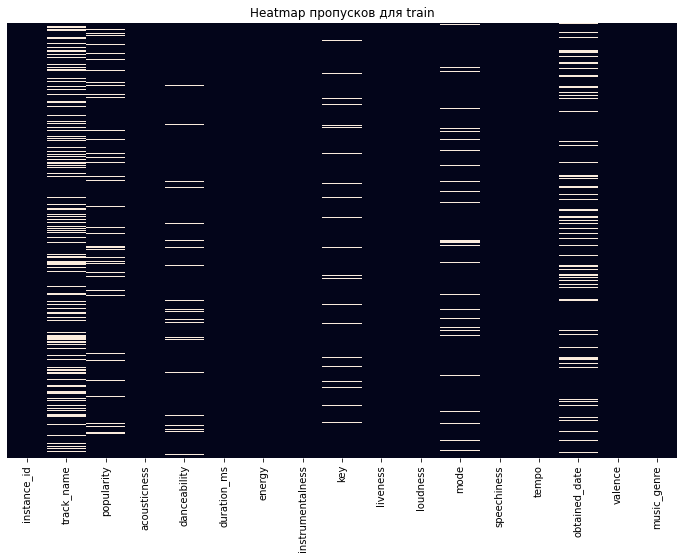

Пропуски в датафрейме test:
               Total  Percent
track_name      2612    26.12
obtained_date   1581    15.81
popularity      1013    10.13
danceability     523     5.23
mode             482     4.82
key              327     3.27



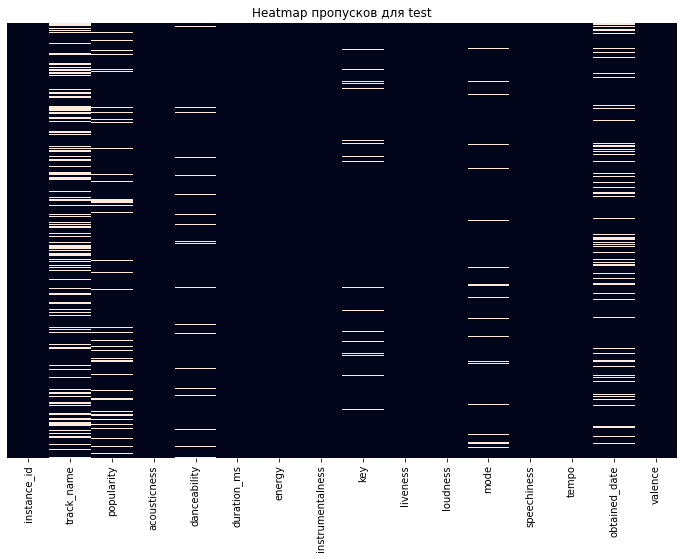

In [189]:
analyze_missing_values(dataframes, ['train', 'test'])

* Несмотря на большое наличие пропусков, данные отсутсвуют лишь в 6 столбцах: `track_name`, `obtained_date`, `popularity`, `danceability`, `mode`, `key`;
* Больше всего пропусков в столбцах `track_name` и `obtained_date` от 15% до 26% от общего кол-ва строк;
* У меня есть предположение, что пропуски могут быть связаны. Думаю, что треки имеющие пропуск в одной переменной, скорее всего имеют другие параметры не заполнеными;
* Построим матрицу корреляции пропусков.

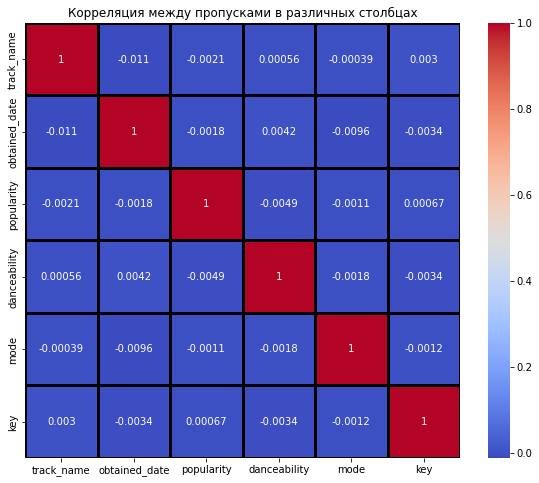

In [190]:
# Создание булевой матрицы пропусков
missing_bool = train[['track_name', 'obtained_date', 'popularity', 'danceability', 'mode', 'key']].isnull()

# Вычисление корреляции между столбцами булевой матрицы
corr = missing_bool.corr(method='spearman')  # Или использовать другой метод корреляции

# Визуализация матрицы корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', square=True)
plt.title('Корреляция между пропусками в различных столбцах')
plt.show()

* Корреляции между пропусками, к сожалению или к счастью, не наблюдается.
* Поэтапно обработаем пропуски.

In [191]:
import scipy
import scipy.stats.stats
from scipy.stats import poisson

In [192]:
import scipy.stats
import phik

# Расчет матрицы корреляции phik
# phik_matrix = train.phik_matrix()

# Построение тепловой карты
# plt.figure(figsize=(12, 8))
# sns.heatmap(phik_matrix, annot=True, fmt='.2f', cmap='Blues')
# plt.title('Тепловая карта корреляции методом phik')
# plt.show()

#### Пропуски в `popularity`, `danceability`, `mode`, `key`

Столбец `popularity` имеет **9.80%** пропусков от общего числа данных. Это достаточно много, поэтому перед удалением, проверим, можно ли заполнить пропуски.

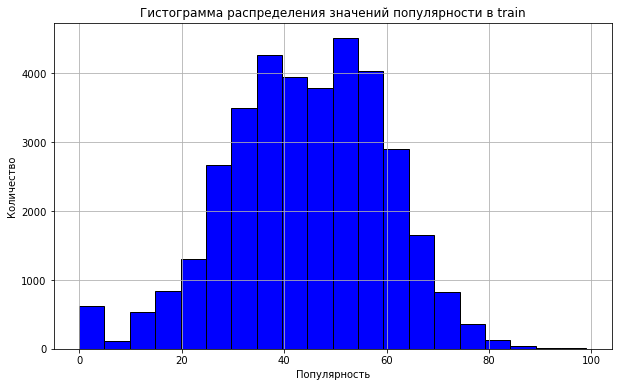

In [193]:
plt.figure(figsize=(10, 6))
plt.hist(train['popularity'], bins=20, color='blue', edgecolor='black')
plt.title('Гистограмма распределения значений популярности в train')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

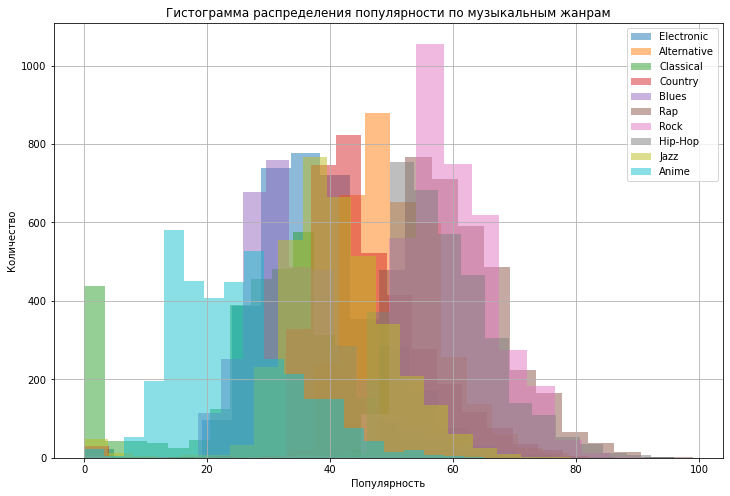

In [194]:
# Уникальные жанры
genres = train['music_genre'].unique()

# Гистограмма для каждого жанра
plt.figure(figsize=(12, 8))
for genre in genres:
    subset = train[train['music_genre'] == genre]
    plt.hist(subset['popularity'], bins=20, label=genre, alpha=0.5)

plt.title('Гистограмма распределения популярности по музыкальным жанрам')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()

* Наблюдается зависимость популярности от жанра музыки. Центр распределения каждой гистограммы смещен вправо или влево по шкале популярности. Таким образом, пропуски в столбце `popularity` можно заполнить на основе среднего значения популярности для каждого жанра.

In [195]:
# Используем функцию заполнения пропусков медианой
fill_na_with_genre_median(train, 'popularity')
# Проверка, что пропуски были заполнены
print(f'Пропусков в столбце popularity: {train["popularity"].isnull().sum()}')

Пропусков в столбце popularity: 0


Посмотрим на распределение популярности жанров после заполнения пропусков.

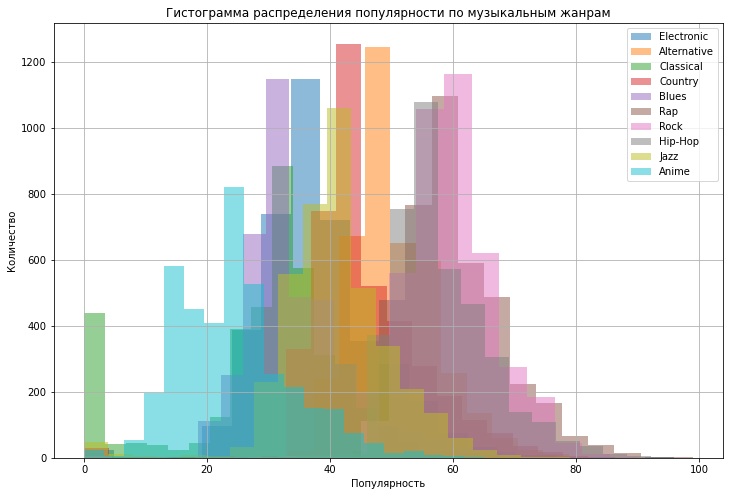

In [196]:
genres = train['music_genre'].unique()    
# Создание гистограмм для каждого жанра
plt.figure(figsize=(12, 8))
for genre in genres:
    subset = train[train['music_genre'] == genre]
    plt.hist(subset['popularity'], bins=20, label=genre, alpha=0.5)

plt.title('Гистограмма распределения популярности по музыкальным жанрам')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()

* Очевидно, что выросли пики связанные с медианным значением каждого жанра. В принципе, можно считать заполнение пропусков удачным в данном случае.


Проверим столбец `danceability`, там тоже моного пропусков.

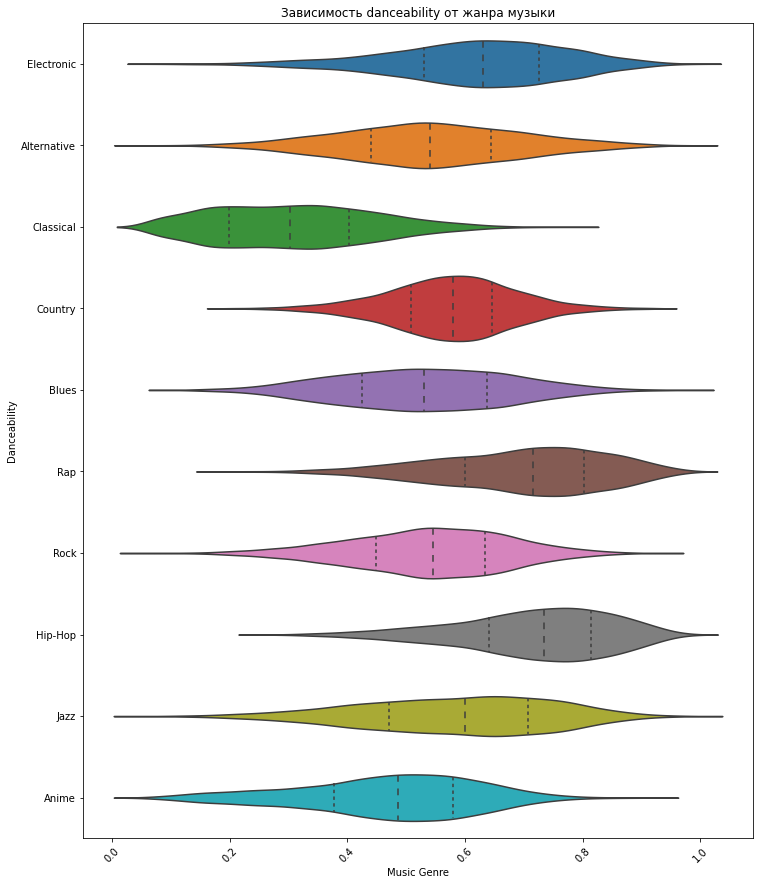

In [197]:
plt.figure(figsize=(12, 15))
sns.violinplot(x='danceability', y='music_genre', data=train,split=True, inner='quart')
plt.xticks(rotation=45)
plt.title('Зависимость danceability от жанра музыки')
plt.xlabel('Music Genre')
plt.ylabel('Danceability')
plt.show()

Так как `danceability` - непрерывная велечина, предлагаю пропуски заменять на случайное число лежащее в пределах 50% распределения значений `danceability` для каждого жанра.\
Границы Q1 (25%) и Q3 (75%)

In [198]:
# Вычисление 25-го и 75-го квартилей для 'danceability' по каждому жанру
quantile_table = train.groupby('music_genre')['danceability'].quantile([0.25, 0.75]).unstack()

# Переименование колонок
quantile_table.columns = ['percentile_25', 'percentile_75']

# Сброс индекса, чтобы 'music_genre' стал колонкой
quantile_table.reset_index(inplace=True)

# Выводим результат
display(quantile_table)

,music_genre,percentile_25,percentile_75
0,Alternative,0.44,0.65
1,Anime,0.38,0.58
2,Blues,0.42,0.64
3,Classical,0.20,0.40
4,Country,0.51,0.65
5,Electronic,0.53,0.73
6,Hip-Hop,0.64,0.81
7,Jazz,0.47,0.71
8,Rap,0.60,0.80
9,Rock,0.45,0.63


In [199]:
print(f'Пропусков в столбце danceability: {train["danceability"].isnull().sum()}')

Пропусков в столбце danceability: 2037


In [200]:
fill_na_with_quantile(train, 'danceability')

print(f'Пропусков в столбце danceability: {train["danceability"].isnull().sum()}')

Пропусков в столбце danceability: 0


Столбец `key` 

In [201]:
top_keys_per_genre = train.groupby('music_genre')['key'].apply(lambda x: x.value_counts().head(3).index.tolist())

train['key'] = train.apply(fill_missing_keys, axis=1)

Столбец `mode` 

In [202]:
fill_na_most_frequent_per_genre(train, 'mode')

Пропущенных данных в этих столбцах мало, менее 5%. Можно смело очистить строки с пропусками.

In [118]:
# Удаление строк
# train = train.dropna(subset=['key'])

# Размер после удаления
# final_size = train.shape[0]

# Расчет и вывод потерь в процентах
# loss_percent = ((initial_size - final_size) / initial_size) * 100

# print(f"Размер до: {initial_size}")
# print(f"Размер после: {final_size}")
# print(f"Потеряно данных: {loss_percent:.2f}%")

#### Пропуски в `track_name` и `obtained_date`

In [119]:
print(f'Кол-во уникальных названий треков в таблице train {len(train.track_name.unique())}')
print(f'Кол-во уникальных названий треков в таблице test {len(test.track_name.unique())}')

Кол-во уникальных названий треков в таблице train 26019
Кол-во уникальных названий треков в таблице test 7124


In [120]:
print(f'Уникальные даты загрузки треков в таблице train {train.obtained_date.unique()}')
print(f'Уникальные даты загрузки треков в таблице test {test.obtained_date.unique()}')

Уникальные даты загрузки треков в таблице train ['4-Apr' nan '5-Apr' '3-Apr' '1-Apr' '0/4']
Уникальные даты загрузки треков в таблице test ['4-Apr' '3-Apr' nan '5-Apr' '1-Apr']


* Оставим пропуски в этих переменных, тк они не пригодятся нам для анализа.
  * `track_name` уникальна, у нее отсутсвует обобщаемость (как и у `instance_id`), которая могла бы помочь в предсказании жанра;
  * `obtainde_date` может не иметь прямого влияния на жанр трека. Так, у нас присутсвуют данные только за арпель, поэтому если в новых данных будут другие даты, модель не сможет правильно экстраполировать полученный результат.

### Дубликаты

In [121]:
dub_df = train.drop(['instance_id', 'track_name', 'obtained_date'], axis=1)
print('Всего дубликатов строк: ',dub_df.duplicated().sum())

Всего дубликатов строк:  1


Бывает, посмотрим на эту парочку

In [122]:
# Найдем индексы дубликатов
duplicates = dub_df.duplicated(keep=False)
duplicate_indices = dub_df[duplicates].index
display(train.loc[duplicate_indices])

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
13576,2161,Sunspot (B-Sides),23.00,0.28,0.70,"409,400.00",0.39,0.88,C,0.11,-13.73,Major,0.04,87.694,4-Apr,0.59,Electronic
32962,3277,NaN,23.00,0.28,0.70,"409,400.00",0.39,0.88,C,0.11,-13.73,Major,0.04,87.694,4-Apr,0.59,Electronic


Оставим как есть, пусть живет!

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       40000 non-null  int64  
 1   track_name        29262 non-null  object 
 2   popularity        40000 non-null  float64
 3   acousticness      40000 non-null  float64
 4   danceability      40000 non-null  float64
 5   duration_ms       40000 non-null  float64
 6   energy            40000 non-null  float64
 7   instrumentalness  40000 non-null  float64
 8   key               40000 non-null  object 
 9   liveness          40000 non-null  float64
 10  loudness          40000 non-null  float64
 11  mode              38147 non-null  object 
 12  speechiness       40000 non-null  float64
 13  tempo             40000 non-null  object 
 14  obtained_date     33781 non-null  object 
 15  valence           40000 non-null  float64
 16  music_genre       40000 non-null  object

### Вывод по итогам предобработки

* Избавились от всех пропусков потеряли всего 4.63%;
* В `popularity` заполнили пропуски медианным значением;
* В `danceability` заполнили пропуски случайным значением лежащим в пределах 50% выборки для каждого жанра.
* Пропуски в `mode` и `key` были удалены из-за их малого кол-ва.

## 3. Исследовательский анализ <a class="anchor" id="chapter3"></a>

В ходе исследовательнского анализа отдельно обработаем каждый столбец, выведем закономерности, посмотрим на взаимосвязи в данных.


### Столбец `popularity`

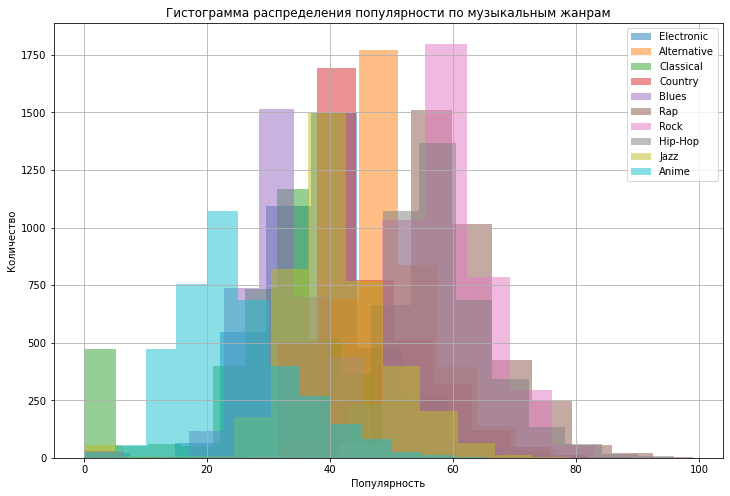

'Описательная статистика для popularity:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,939.00",50.25,7.19,0.00,46.00,49.00,54.00,83.00
Anime,"4,003.00",24.08,9.18,0.00,17.00,23.00,29.00,65.00
Blues,"3,987.00",34.66,9.18,0.00,29.00,33.00,38.00,74.00
Classical,"4,019.00",29.66,13.40,0.00,26.00,32.00,37.00,68.00
Country,"4,024.00",45.80,9.29,0.00,40.00,44.00,51.00,82.00
Electronic,"4,051.00",38.01,9.27,0.00,32.00,37.00,43.00,96.00
Hip-Hop,"3,935.00",58.23,7.90,19.00,53.00,57.00,62.00,96.00
Jazz,"4,023.00",40.85,9.09,0.00,36.00,40.00,45.00,79.00
Rap,"3,964.00",60.43,7.82,14.00,55.00,59.00,65.00,99.00


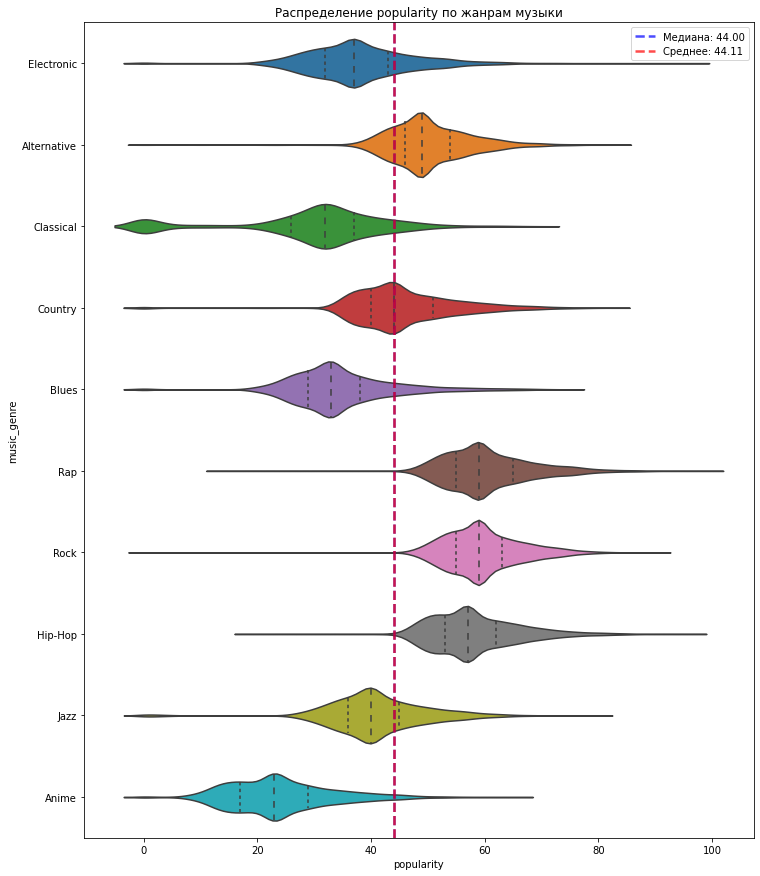

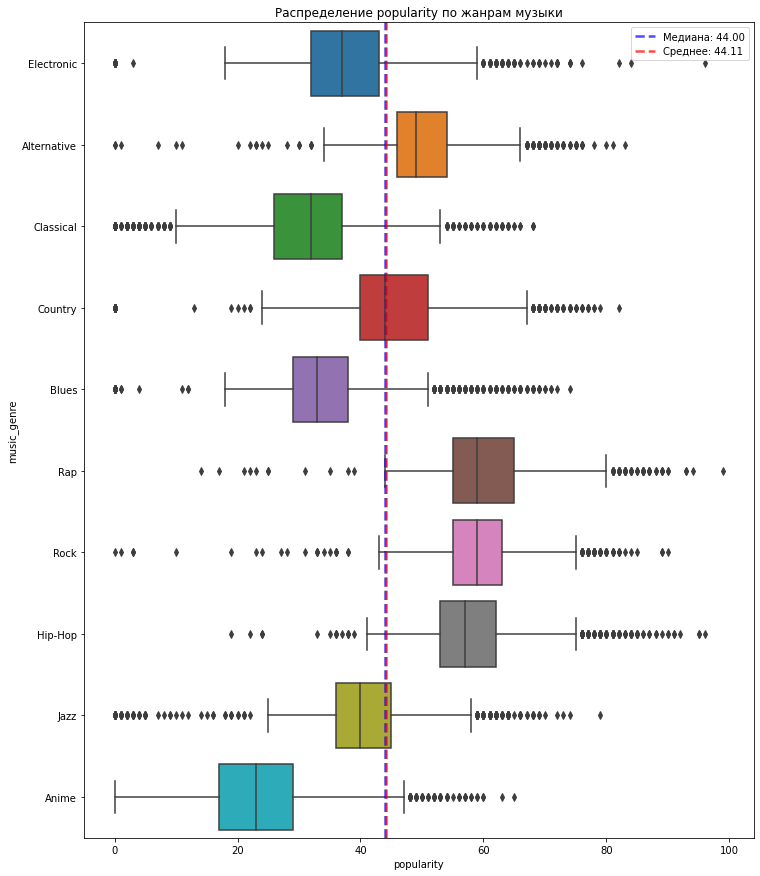

In [124]:
plt.figure(figsize=(12, 8))
for genre in genres:
    subset = train[train['music_genre'] == genre]
    plt.hist(subset['popularity'], bins=13, label=genre, alpha=0.5)
plt.title('Гистограмма распределения популярности по музыкальным жанрам')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()
descriptive_stats_and_plot(train, 'popularity')

* Видна зависимость популярности трека от его жанра;
* Нет критичных выбросов или ошибочных, пропущенных значений;
* Изменим тип столбца на *Int*.

In [125]:
train['popularity'] = train['popularity'].astype(int)

In [126]:
# проверим тип столбца
print(train['popularity'].dtypes)

int32


### Столбец `acousticness`

'Описательная статистика для acousticness:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,939.00",0.16,0.24,0.00,0.00,0.03,0.24,0.98
Anime,"4,003.00",0.29,0.37,0.00,0.01,0.07,0.61,1.00
Blues,"3,987.00",0.32,0.31,0.00,0.04,0.22,0.56,0.99
Classical,"4,019.00",0.87,0.26,0.00,0.91,0.97,0.99,1.00
Country,"4,024.00",0.27,0.26,0.00,0.05,0.18,0.43,0.98
Electronic,"4,051.00",0.12,0.20,0.00,0.00,0.03,0.14,0.98
Hip-Hop,"3,935.00",0.18,0.19,0.00,0.03,0.11,0.27,0.98
Jazz,"4,023.00",0.49,0.34,0.00,0.15,0.51,0.82,1.00
Rap,"3,964.00",0.17,0.19,0.00,0.03,0.09,0.25,0.94


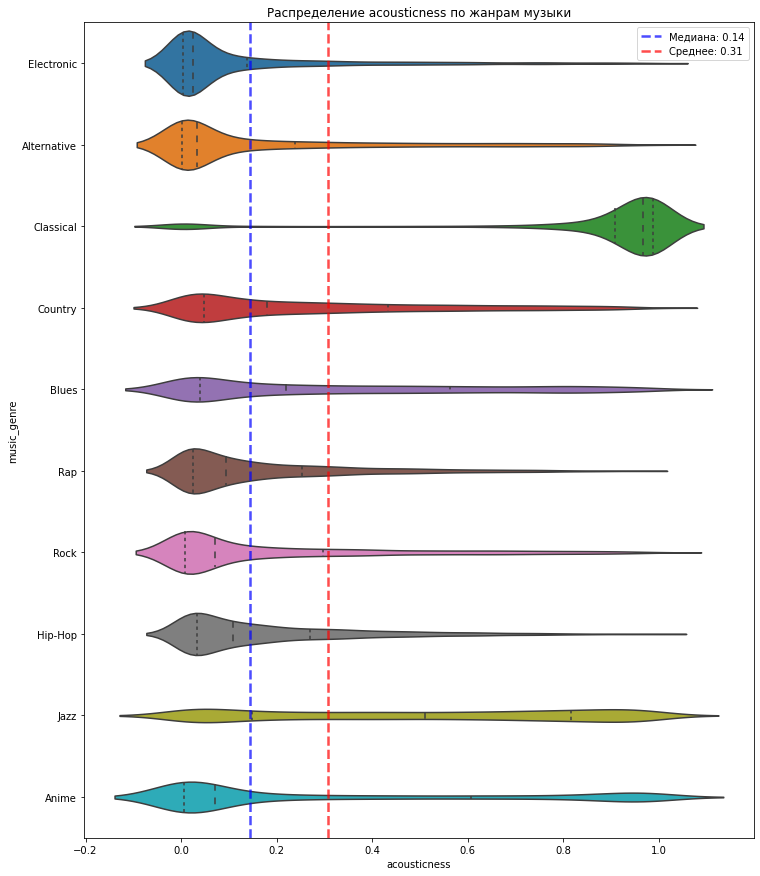

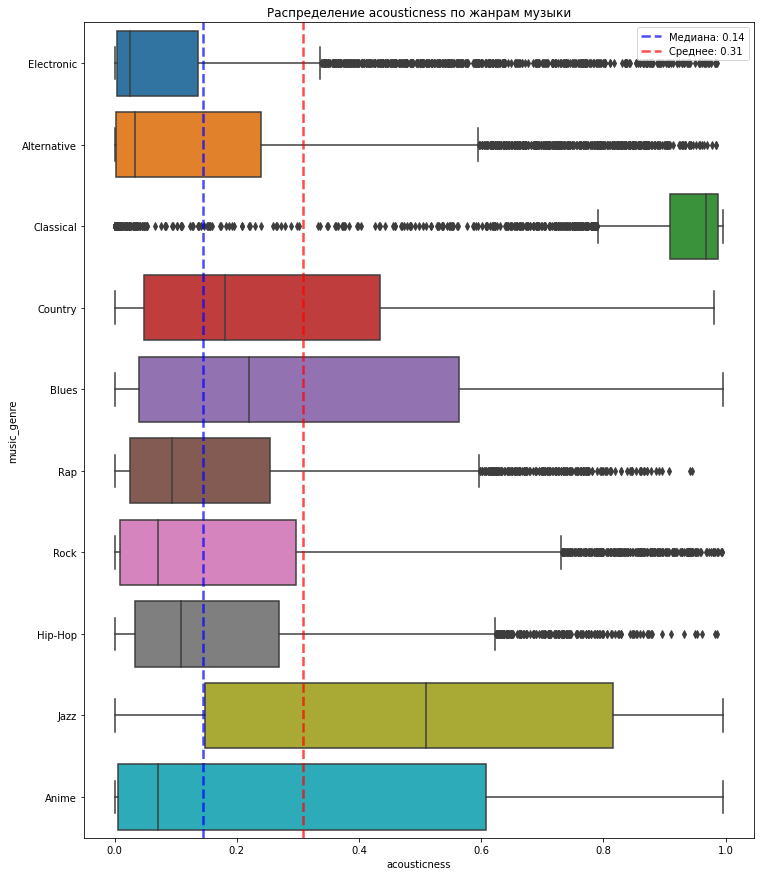

In [127]:
descriptive_stats_and_plot(train, 'acousticness')

* В целом, выделяется только значения в жанре **Classical**, они смещают медиану со средним и немного "ломают восприятие";
* Построим график без этого жанра.

'Описательная статистика для acousticness:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,939.00",0.16,0.24,0.00,0.00,0.03,0.24,0.98
Anime,"4,003.00",0.29,0.37,0.00,0.01,0.07,0.61,1.00
Blues,"3,987.00",0.32,0.31,0.00,0.04,0.22,0.56,0.99
Country,"4,024.00",0.27,0.26,0.00,0.05,0.18,0.43,0.98
Electronic,"4,051.00",0.12,0.20,0.00,0.00,0.03,0.14,0.98
Hip-Hop,"3,935.00",0.18,0.19,0.00,0.03,0.11,0.27,0.98
Jazz,"4,023.00",0.49,0.34,0.00,0.15,0.51,0.82,1.00
Rap,"3,964.00",0.17,0.19,0.00,0.03,0.09,0.25,0.94
Rock,"4,055.00",0.19,0.25,0.00,0.01,0.07,0.30,0.99


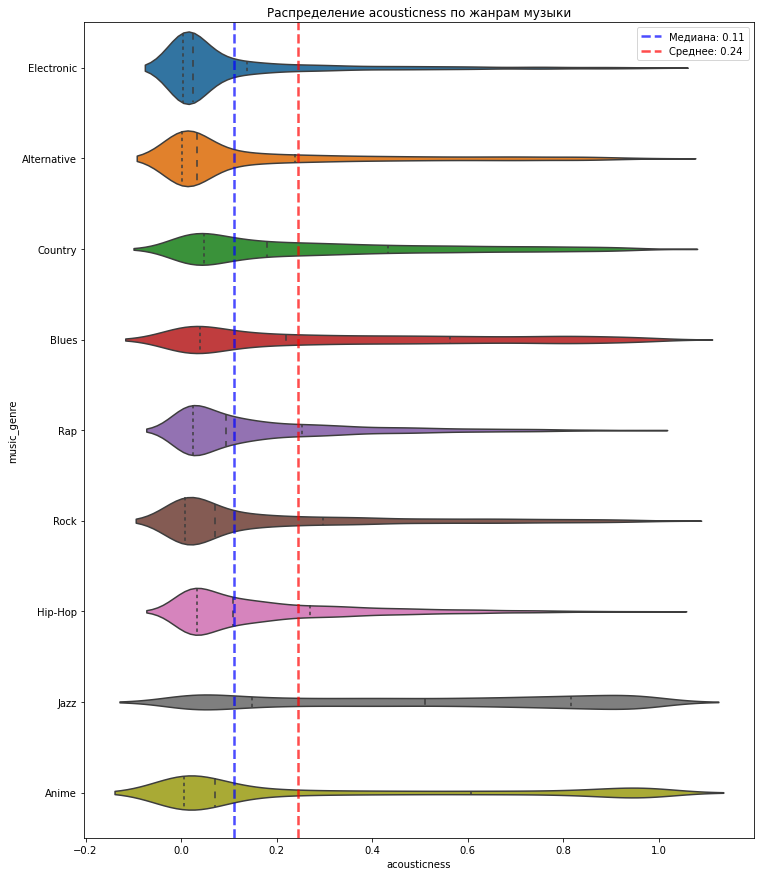

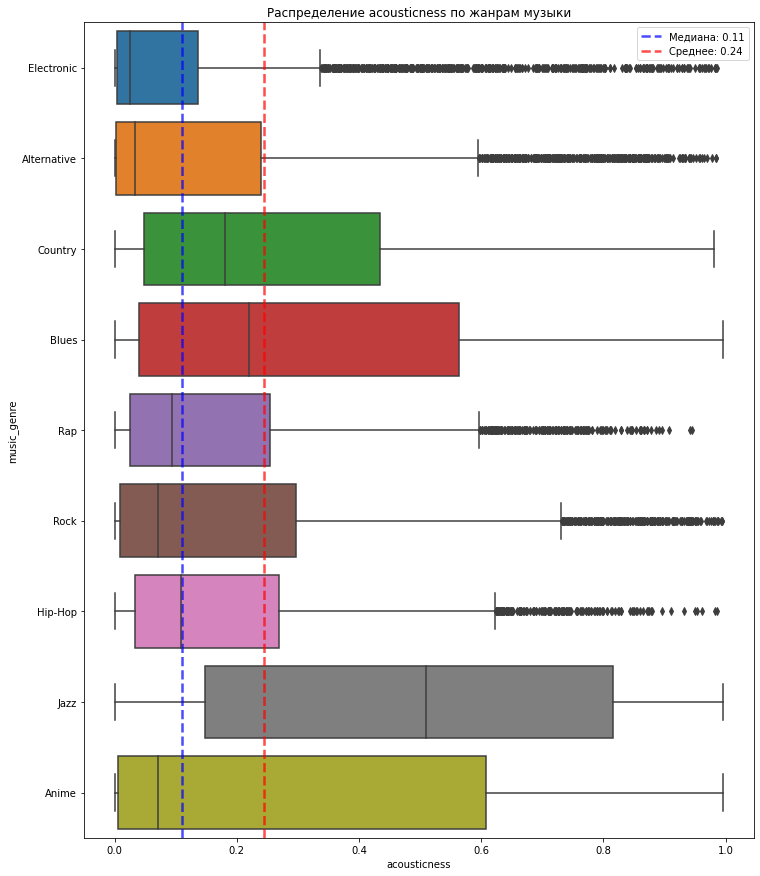

In [128]:
descriptive_stats_and_plot((train[train['music_genre'] != 'Classical']), 'acousticness')

* Числовые метрики сместились влево.
* Критических выбросов или ошибочных значений не обнаружено.

### Столбец `danceability` 

'Описательная статистика для danceability:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,939.00",0.54,0.15,0.06,0.44,0.54,0.64,0.97
Anime,"4,003.00",0.47,0.15,0.06,0.39,0.48,0.57,0.91
Blues,"3,987.00",0.53,0.14,0.12,0.43,0.53,0.63,0.97
Classical,"4,019.00",0.31,0.13,0.06,0.20,0.30,0.40,0.78
Country,"4,024.00",0.58,0.11,0.20,0.51,0.58,0.64,0.92
Electronic,"4,051.00",0.62,0.14,0.08,0.54,0.63,0.72,0.98
Hip-Hop,"3,935.00",0.72,0.13,0.27,0.65,0.73,0.81,0.98
Jazz,"4,023.00",0.58,0.16,0.06,0.48,0.60,0.70,0.98
Rap,"3,964.00",0.70,0.14,0.20,0.61,0.71,0.80,0.97


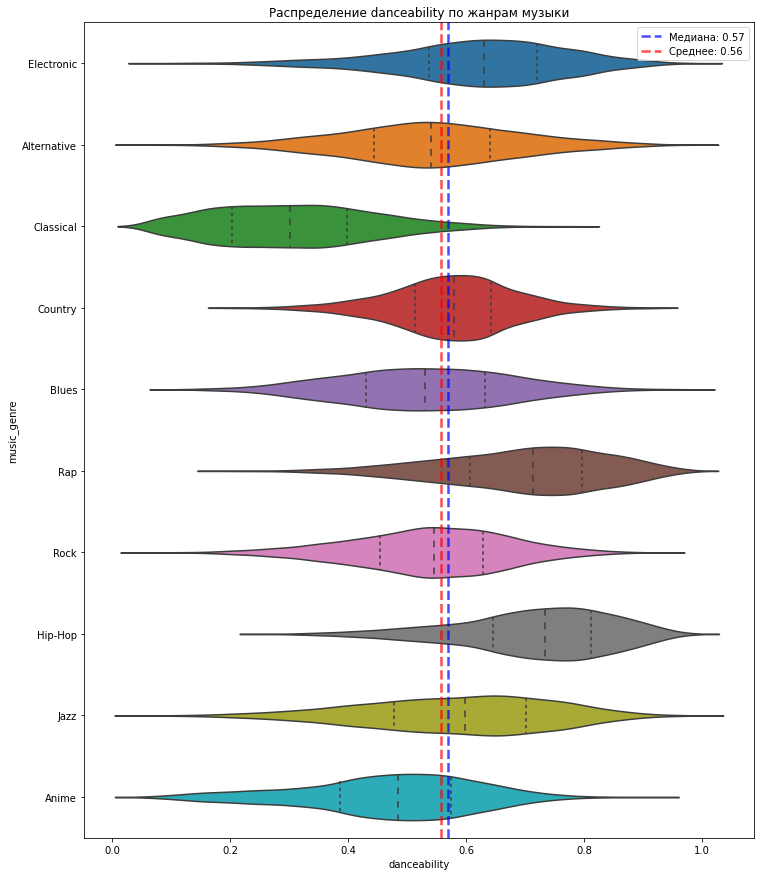

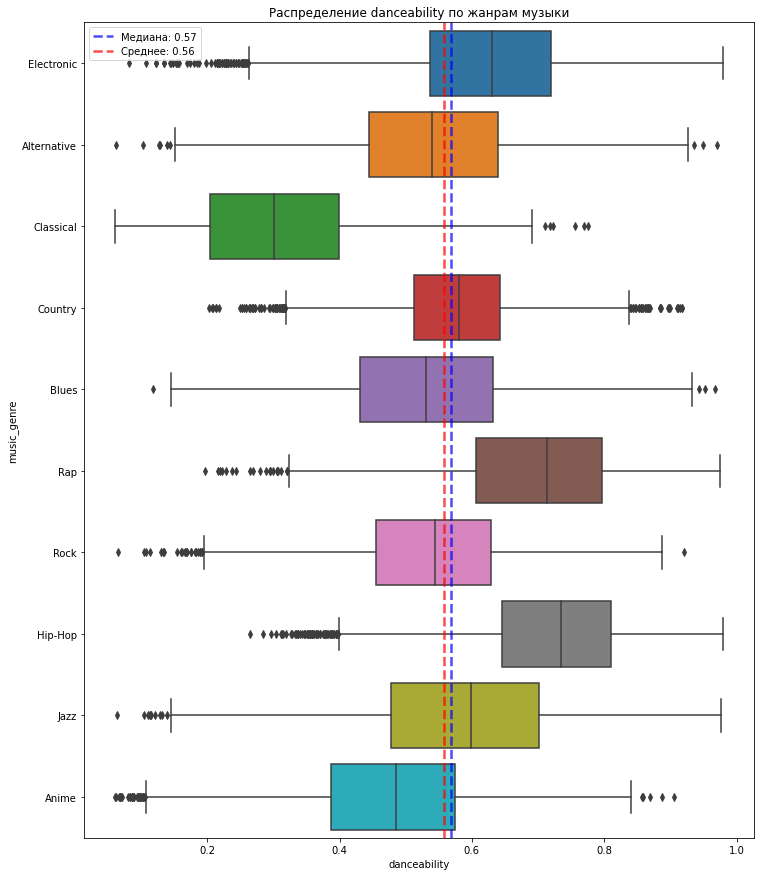

In [129]:
descriptive_stats_and_plot(train, 'danceability')

'Описательная статистика для danceability:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,939.00",0.54,0.15,0.06,0.44,0.54,0.64,0.97
Anime,"4,003.00",0.47,0.15,0.06,0.39,0.48,0.57,0.91
Blues,"3,987.00",0.53,0.14,0.12,0.43,0.53,0.63,0.97
Country,"4,024.00",0.58,0.11,0.20,0.51,0.58,0.64,0.92
Electronic,"4,051.00",0.62,0.14,0.08,0.54,0.63,0.72,0.98
Hip-Hop,"3,935.00",0.72,0.13,0.27,0.65,0.73,0.81,0.98
Jazz,"4,023.00",0.58,0.16,0.06,0.48,0.60,0.70,0.98
Rap,"3,964.00",0.70,0.14,0.20,0.61,0.71,0.80,0.97
Rock,"4,055.00",0.54,0.13,0.06,0.46,0.55,0.63,0.92


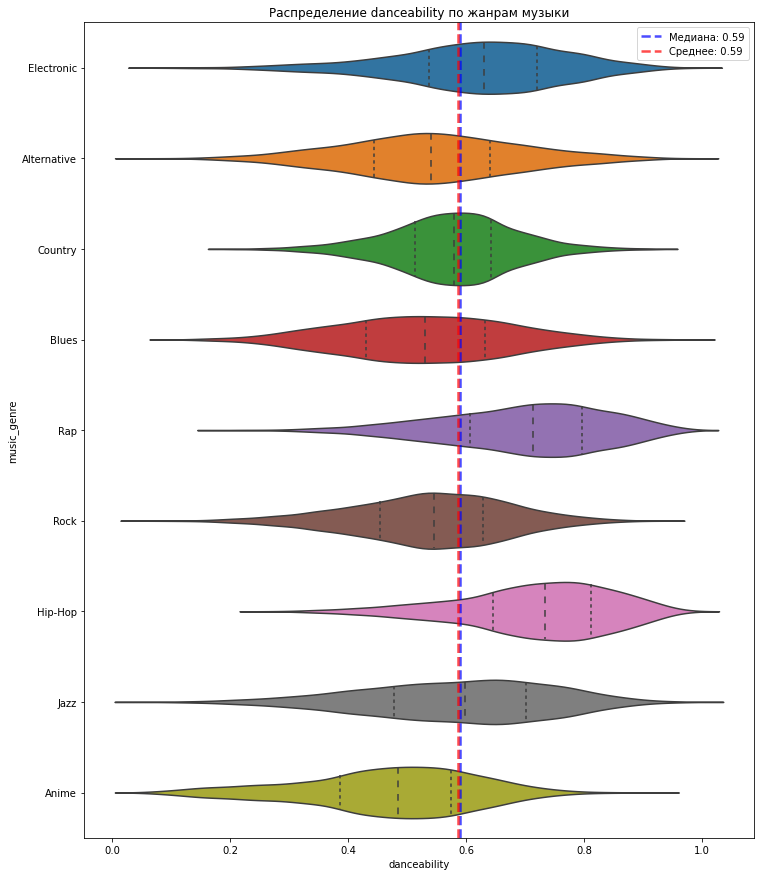

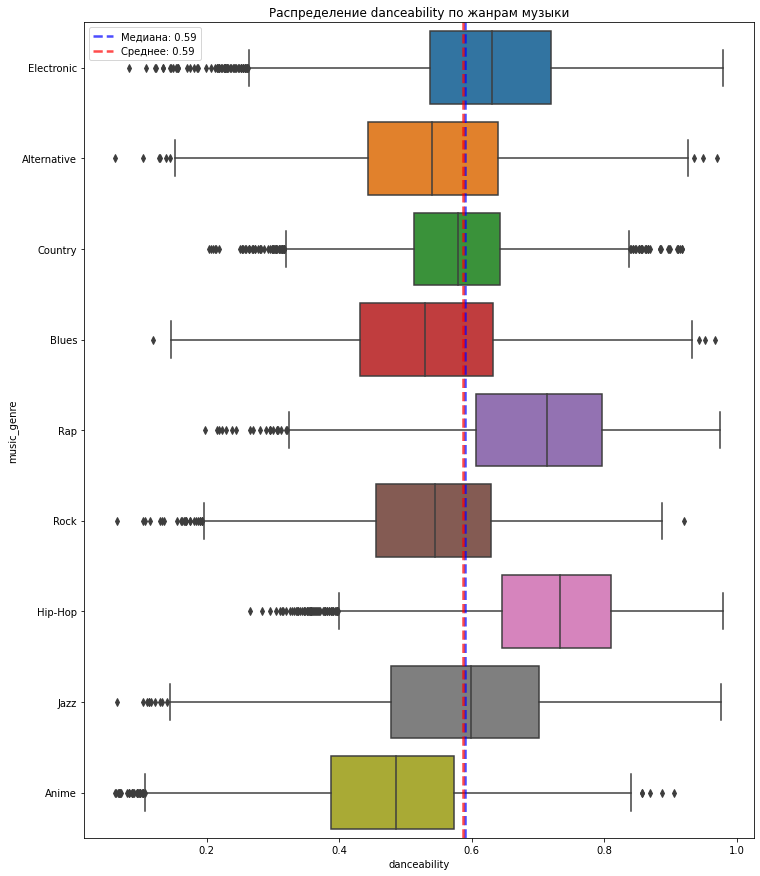

In [130]:
descriptive_stats_and_plot((train[train['music_genre'] != 'Classical']), 'danceability')

* Аномалии не выявлены, оставим столбец как есть.

### Столбец `duration_ms`

'Описательная статистика для duration_ms:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,939.00","209,780.79","91,014.45",-1.00,"186,089.50","219,721.00","255,283.50","656,493.00"
Anime,"4,003.00","209,879.58","106,474.48",-1.00,"146,426.50","230,587.00","274,113.50","1,295,600.00"
Blues,"3,987.00","228,155.76","133,465.46",-1.00,"171,540.00","220,187.00","279,333.50","2,019,293.00"
Classical,"4,019.00","278,239.43","221,911.34",-1.00,"148,306.50","241,133.00","363,853.50","3,195,440.00"
Country,"4,024.00","196,473.37","76,617.04",-1.00,"180,067.00","207,383.50","233,982.50","599,315.00"
Electronic,"4,051.00","243,799.17","168,260.47",-1.00,"192,000.00","236,471.00","297,846.50","4,830,606.00"
Hip-Hop,"3,935.00","199,609.15","86,518.87",-1.00,"168,880.50","210,467.00","249,320.00","723,573.00"
Jazz,"4,023.00","238,066.23","130,461.86",-1.00,"171,861.00","236,800.00","303,966.50","1,237,960.00"
Rap,"3,964.00","195,701.47","85,594.96",-1.00,"167,972.50","207,053.50","243,857.75","579,293.00"


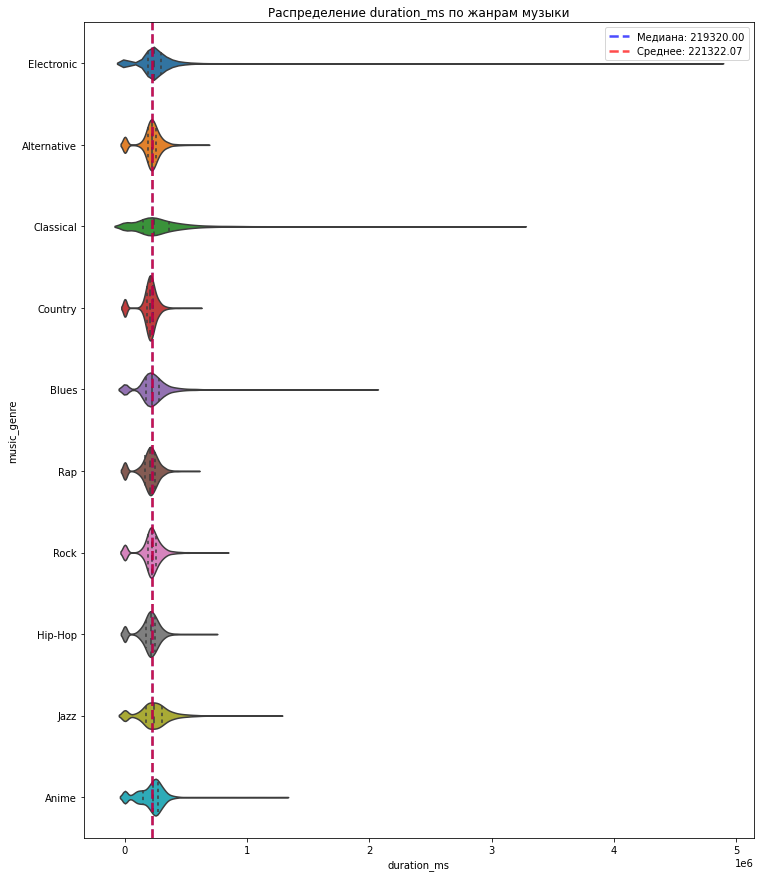

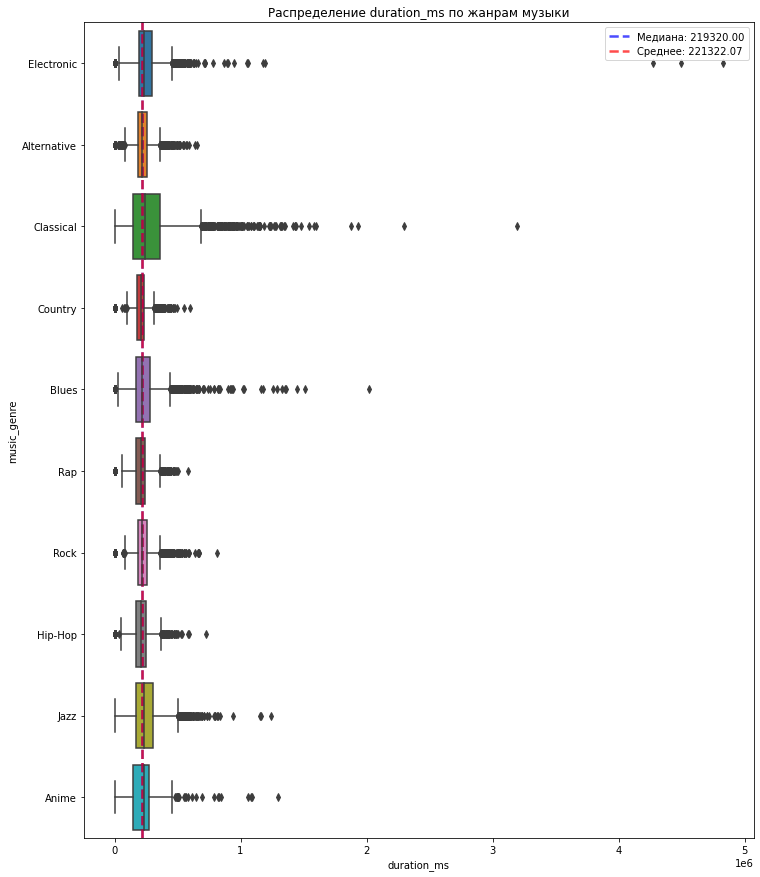

In [131]:
descriptive_stats_and_plot(train, 'duration_ms')

* Столбец содержит целочисленные значения, поменяем тип на int.
* В столбце несколько проблем:
    * Наличие выбросов искажающих общую картину средней длительности трека;
    * Наличие отрицательных значений длительности трека;
    * Неправильный тип столбца.


Отрицательные значения `duration_ms`
* Отрицательные значения в этом столбце - по сути, неявные пропуски. Поскольку, все отрицательные значания равны **-1**, что делает иъ схожими.
* Возможно ошибка вызвана техническим сбоем или человеческим фактором.

In [132]:
train['duration_ms'].replace(-1, np.nan, inplace=True)
print(f'Пропусков в столбце duration_ms: {train["duration_ms"].isnull().sum()}')

Пропусков в столбце duration_ms: 3956


In [133]:
fill_na_with_genre_median(train, 'duration_ms')

print(f'Пропусков в столбце duration_ms: {train["duration_ms"].isnull().sum()}')

Пропусков в столбце duration_ms: 0


Исправим тип переменной

In [134]:
train['duration_ms'] = train['duration_ms'].astype(int)
print(train['duration_ms'].dtypes)

int32


Исправим длительность

'Описательная статистика для duration_ms:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,939.00","232,823.89","57,325.27","24,000.00","201,077.50","225,787.00","255,283.50","656,493.00"
Anime,"4,003.00","231,715.15","81,555.81","30,515.00","191,026.50","238,960.00","274,113.50","1,000,000.00"
Blues,"3,987.00","249,798.37","100,777.15","30,097.00","190,813.50","229,000.00","279,333.50","1,000,000.00"
Classical,"4,019.00","301,637.28","179,713.72","16,316.00","188,056.50","261,667.00","363,853.50","1,000,000.00"
Country,"4,024.00","216,563.21","42,694.72","56,227.00","191,520.00","211,626.00","233,982.50","599,315.00"
Electronic,"4,051.00","264,584.53","93,359.49","34,059.00","210,259.50","244,965.00","297,846.50","1,000,000.00"
Hip-Hop,"3,935.00","220,367.45","57,027.74","33,093.00","187,589.50","216,094.00","249,320.00","723,573.00"
Jazz,"4,023.00","262,318.39","103,148.44","19,693.00","196,633.50","248,407.00","303,966.50","1,000,000.00"
Rap,"3,964.00","218,004.51","53,598.04","59,118.00","187,329.00","214,065.00","243,857.75","579,293.00"


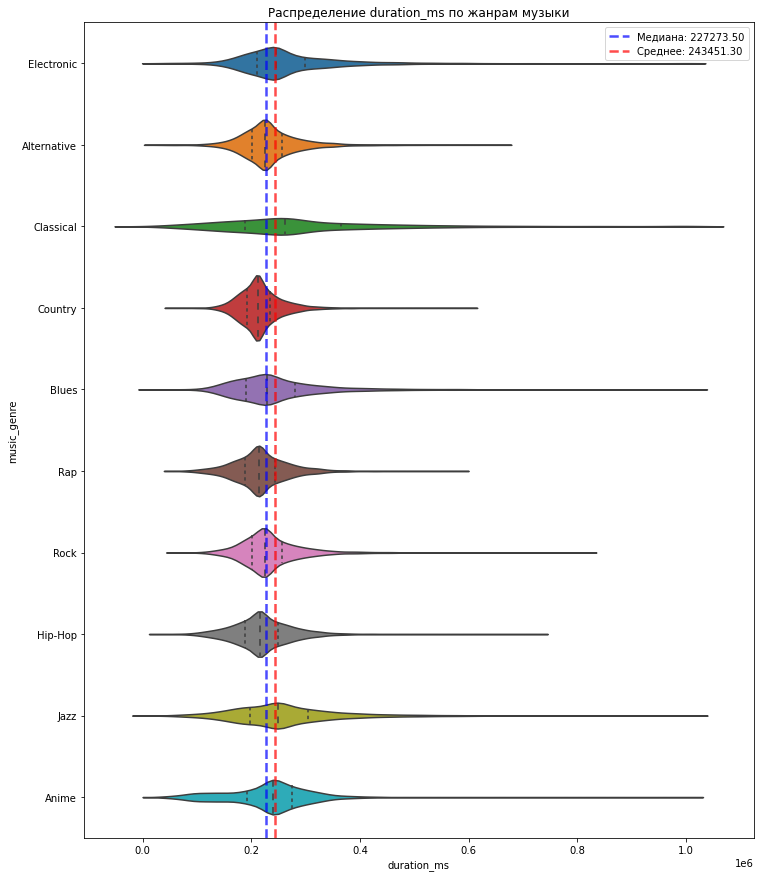

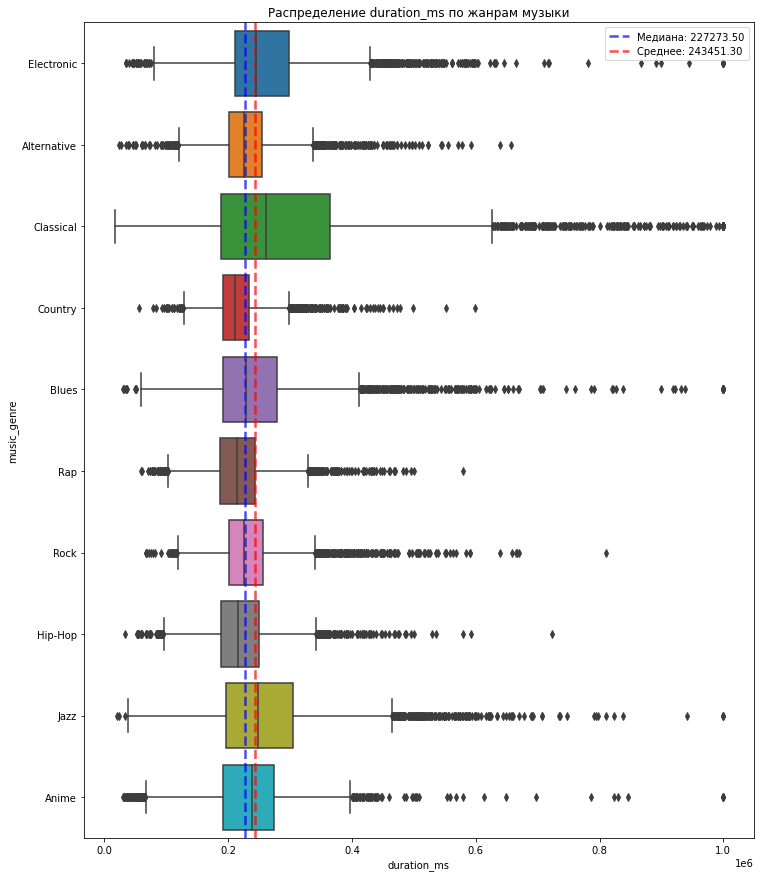

In [135]:
train.loc[train['duration_ms'] > 1000000, 'duration_ms'] = 1000000
descriptive_stats_and_plot(train, 'duration_ms')

### Столбец `energy` 

'Описательная статистика для energy:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,939.00",0.71,0.21,0.05,0.56,0.75,0.89,1.00
Anime,"4,003.00",0.66,0.30,0.00,0.41,0.77,0.93,1.00
Blues,"3,987.00",0.61,0.23,0.01,0.44,0.63,0.80,1.00
Classical,"4,019.00",0.18,0.23,0.00,0.04,0.10,0.21,0.99
Country,"4,024.00",0.64,0.20,0.02,0.50,0.67,0.80,0.98
Electronic,"4,051.00",0.74,0.19,0.02,0.61,0.78,0.90,1.00
Hip-Hop,"3,935.00",0.65,0.15,0.10,0.54,0.65,0.76,0.99
Jazz,"4,023.00",0.47,0.24,0.00,0.29,0.48,0.65,1.00
Rap,"3,964.00",0.65,0.16,0.08,0.54,0.65,0.76,1.00


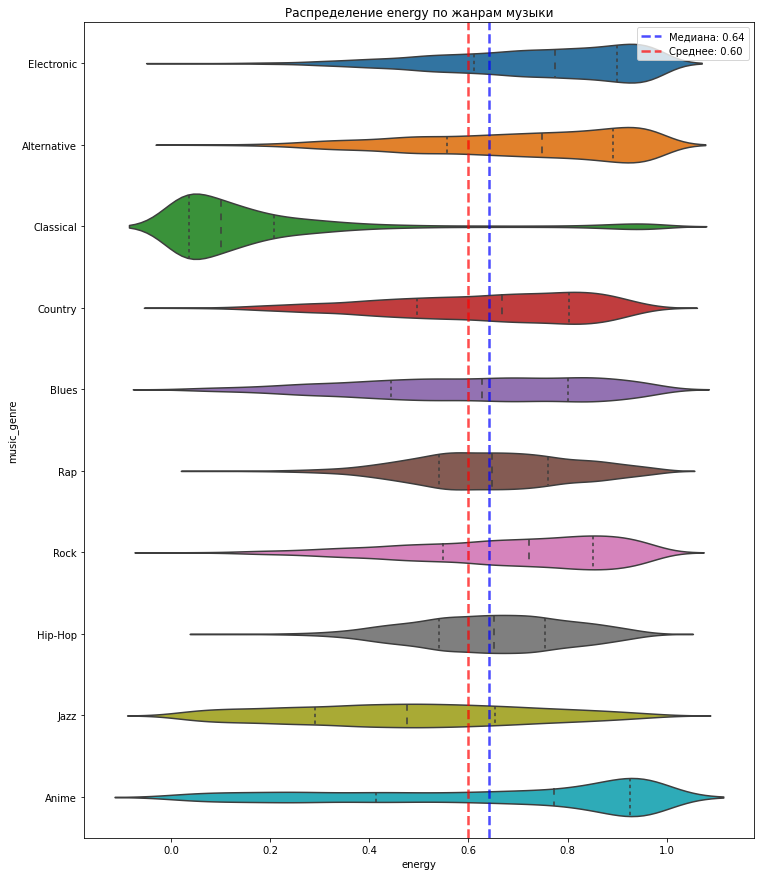

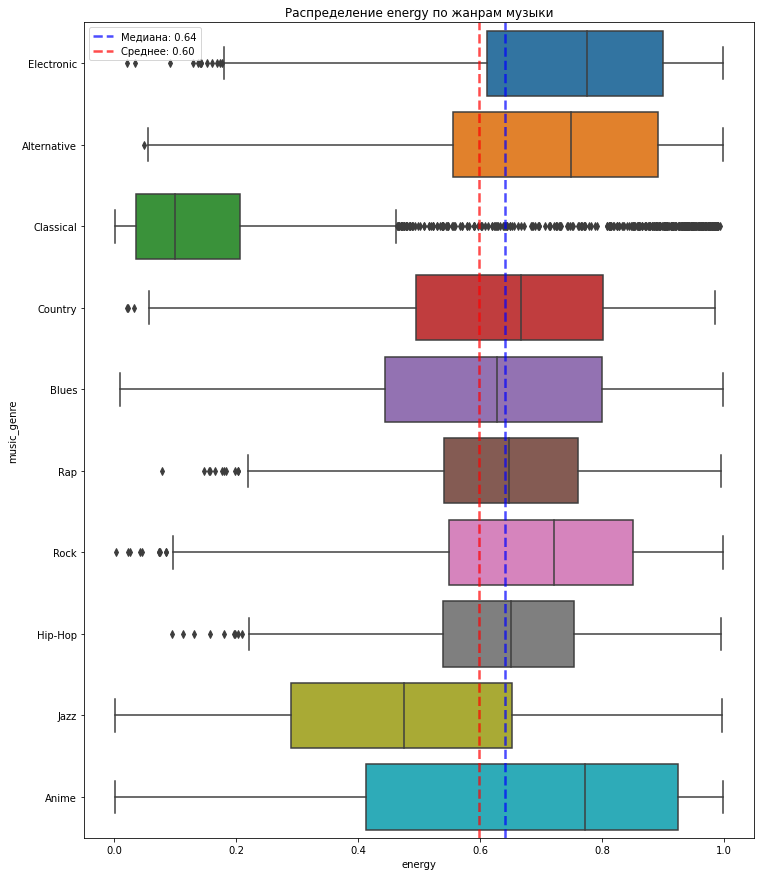

In [136]:
descriptive_stats_and_plot(train, 'energy')

* Аномалий в данных не обнаружено;
* Как всегда выделяется жанр **Classical** центр распределения смещено сильно влево отностельно средних значений;
* Видент тренд зависимости `energy` для каждого жанра музыки.

### Столбец `instrumentalness`

'Описательная статистика для instrumentalness:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,939.00",0.06,0.17,0.00,0.00,0.00,0.01,0.94
Anime,"4,003.00",0.28,0.39,0.00,0.00,0.00,0.78,0.99
Blues,"3,987.00",0.09,0.21,0.00,0.00,0.00,0.03,0.97
Classical,"4,019.00",0.60,0.38,0.00,0.15,0.83,0.91,0.99
Country,"4,024.00",0.01,0.04,0.00,0.00,0.00,0.00,0.78
Electronic,"4,051.00",0.35,0.36,0.00,0.00,0.19,0.75,0.99
Hip-Hop,"3,935.00",0.01,0.07,0.00,0.00,0.00,0.00,0.93
Jazz,"4,023.00",0.35,0.38,0.00,0.00,0.12,0.80,0.98
Rap,"3,964.00",0.01,0.06,0.00,0.00,0.00,0.00,0.92


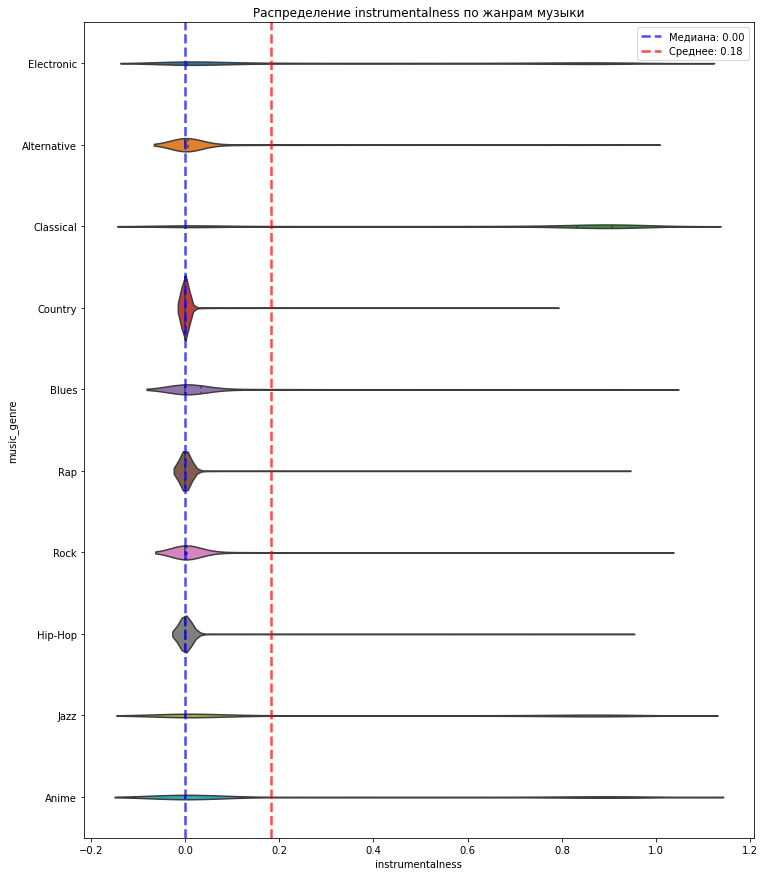

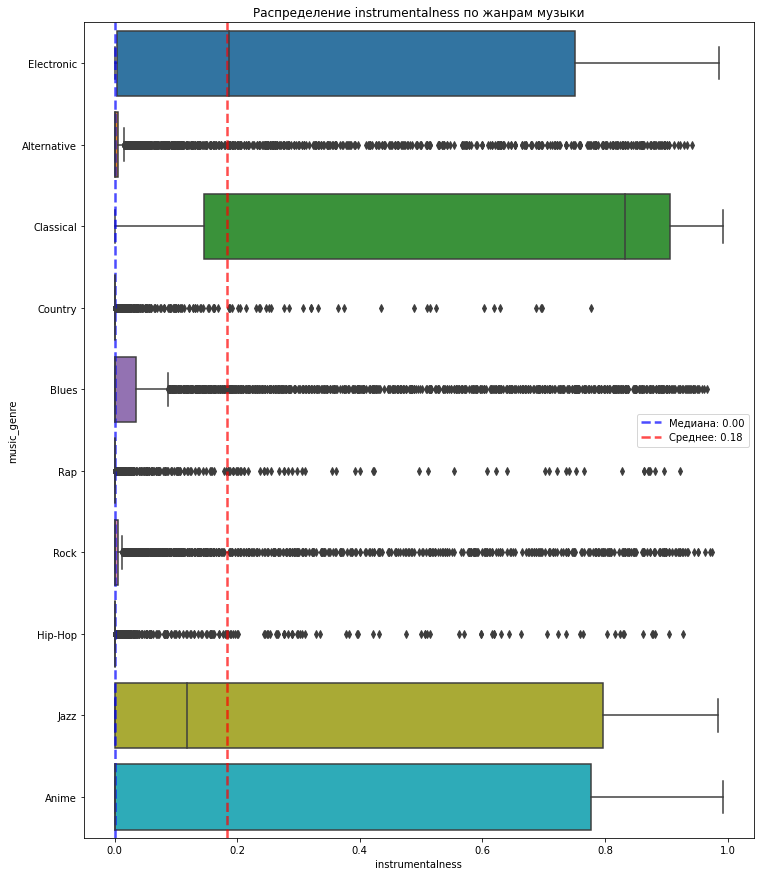

In [137]:
descriptive_stats_and_plot(train, 'instrumentalness')

* Выделяются значительно некоторые классы.
* Возможно на основе этой категории получится создать синтетический признак.

In [138]:
# Создание нового синтетического признака
# Например, сочетание энергии трека и его громкости, которое может отражать общую "силу" трека
# train['energy_loudness'] = train['energy'] * train['loudness']

# Проверка результата
# train[['energy', 'loudness', 'energy_loudness']].head()

In [139]:
# Избавляемся от лишних строк при помощи процентилей
# upper_lim = train['column'].quantile(.95)
# lower_lim = train['column'].quantile(.05)
# train = train[(train['column'] < upper_lim) & (train['column'] > lower_lim)]

### Столбец key 

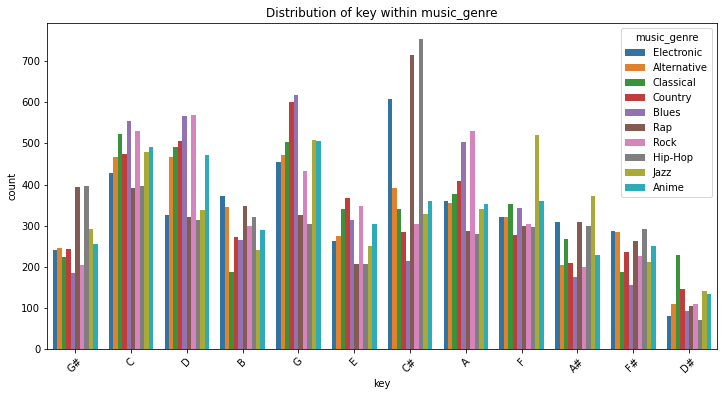

key            A   A#    B    C   C#    D   D#    E    F   F#    G   G#
music_genre                                                            
Alternative 0.09 0.05 0.09 0.12 0.10 0.12 0.03 0.07 0.08 0.07 0.12 0.06
Anime       0.09 0.06 0.07 0.12 0.09 0.12 0.03 0.08 0.09 0.06 0.13 0.06
Blues       0.13 0.04 0.07 0.14 0.05 0.14 0.02 0.08 0.09 0.04 0.15 0.05
Classical   0.09 0.07 0.05 0.13 0.08 0.12 0.06 0.08 0.09 0.05 0.13 0.06
Country     0.10 0.05 0.07 0.12 0.07 0.13 0.04 0.09 0.07 0.06 0.15 0.06
Electronic  0.09 0.08 0.09 0.11 0.15 0.08 0.02 0.06 0.08 0.07 0.11 0.06
Hip-Hop     0.07 0.08 0.08 0.10 0.19 0.08 0.02 0.05 0.08 0.07 0.08 0.10
Jazz        0.08 0.09 0.06 0.12 0.08 0.08 0.04 0.06 0.13 0.05 0.13 0.07
Rap         0.07 0.08 0.09 0.10 0.18 0.08 0.03 0.05 0.08 0.07 0.08 0.10
Rock        0.13 0.05 0.07 0.13 0.08 0.14 0.03 0.09 0.07 0.06 0.11 0.05


In [215]:
stats = categorical_analysis(train, 'key')
print(stats)

### Столбец liveness

'Описательная статистика для liveness:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,759.00",0.20,0.15,0.02,0.10,0.13,0.26,0.99
Anime,"3,825.00",0.19,0.14,0.02,0.10,0.14,0.28,0.96
Blues,"3,799.00",0.23,0.22,0.01,0.10,0.14,0.29,1.00
Classical,"3,833.00",0.16,0.14,0.02,0.09,0.11,0.16,0.99
Country,"3,833.00",0.19,0.15,0.02,0.10,0.13,0.23,0.98
Electronic,"3,853.00",0.21,0.17,0.02,0.10,0.13,0.28,0.98
Hip-Hop,"3,762.00",0.20,0.15,0.02,0.10,0.14,0.27,0.99
Jazz,"3,842.00",0.17,0.15,0.02,0.09,0.11,0.18,0.98
Rap,"3,780.00",0.20,0.15,0.02,0.10,0.14,0.25,0.99


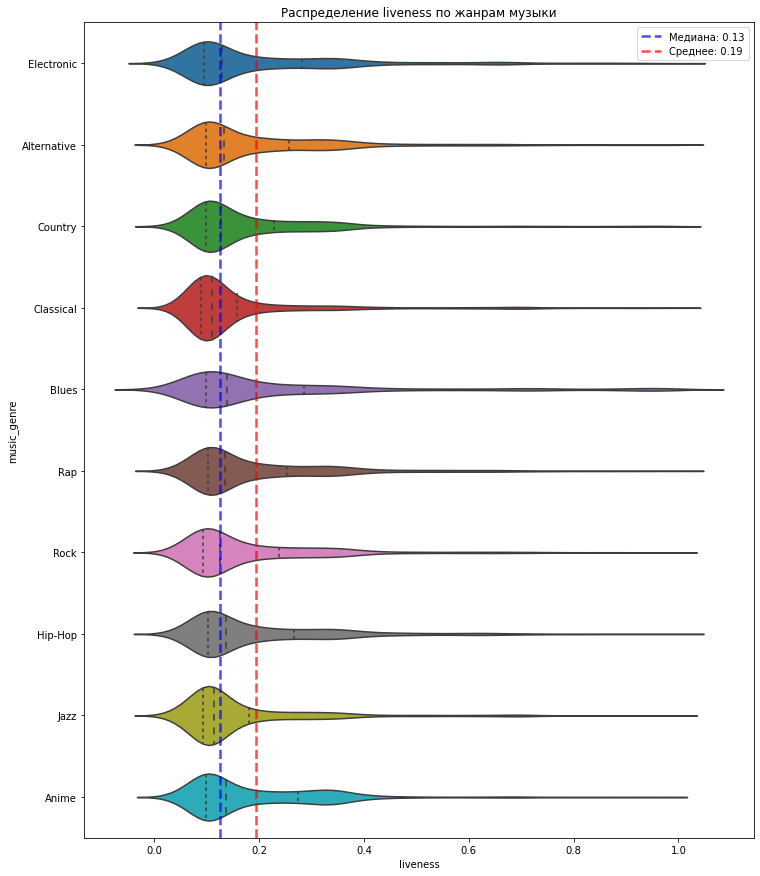

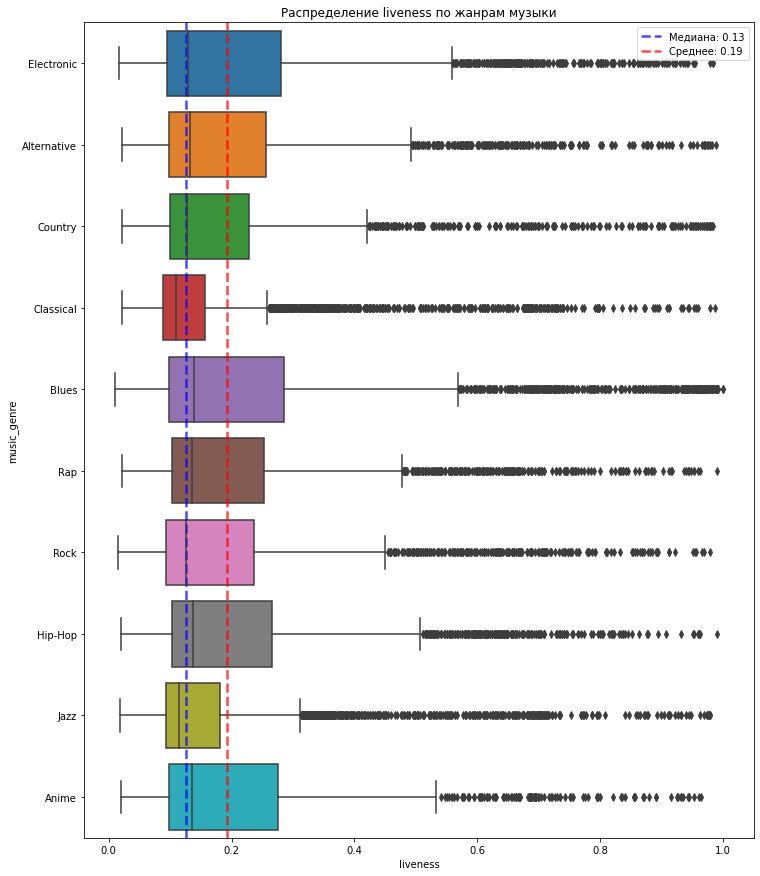

In [356]:
descriptive_stats_and_plot(train, 'liveness')

### Столбец loudness (#section3_6)

'Описательная статистика для loudness:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,759.00",-9.05,13.33,-85.65,-8.37,-6.12,-4.54,1.34
Anime,"3,825.00",-10.22,13.62,-102.73,-11.59,-5.88,-3.69,1.61
Blues,"3,799.00",-12.02,14.76,-89.55,-11.91,-8.66,-6.23,3.74
Classical,"3,833.00",-24.09,15.14,-110.95,-27.02,-22.32,-17.45,-2.35
Country,"3,833.00",-9.81,13.31,-86.84,-9.28,-6.63,-5.10,-0.52
Electronic,"3,853.00",-9.26,12.82,-88.17,-9.64,-6.59,-4.46,1.58
Hip-Hop,"3,762.00",-9.65,13.95,-85.39,-8.44,-6.63,-5.22,1.01
Jazz,"3,842.00",-13.67,13.78,-96.64,-14.06,-10.53,-7.93,-1.69
Rap,"3,780.00",-9.24,13.32,-84.25,-8.27,-6.48,-5.11,-0.80


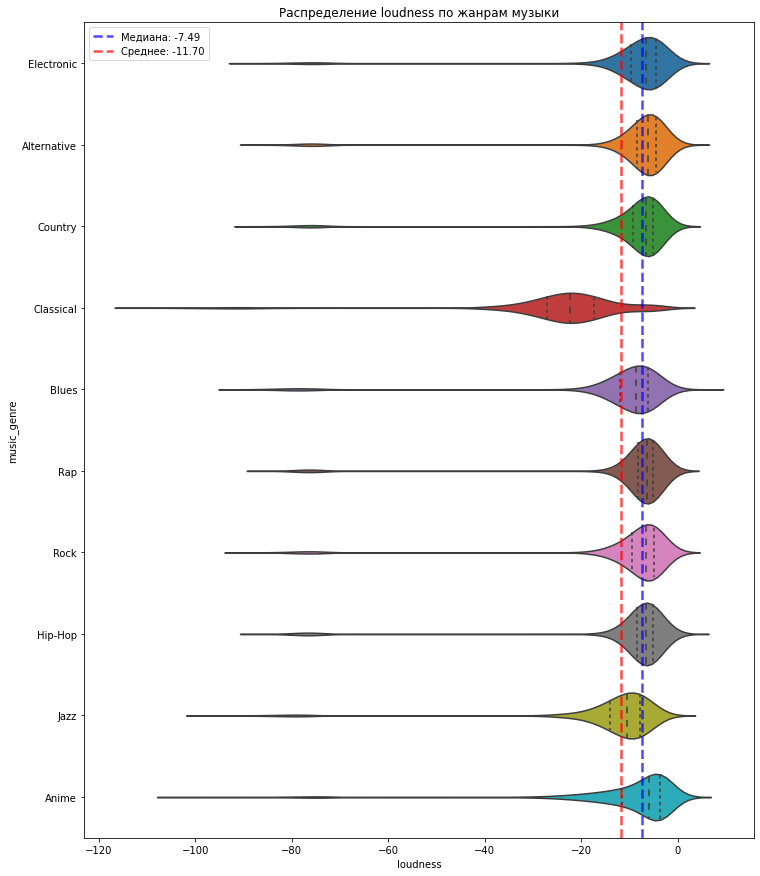

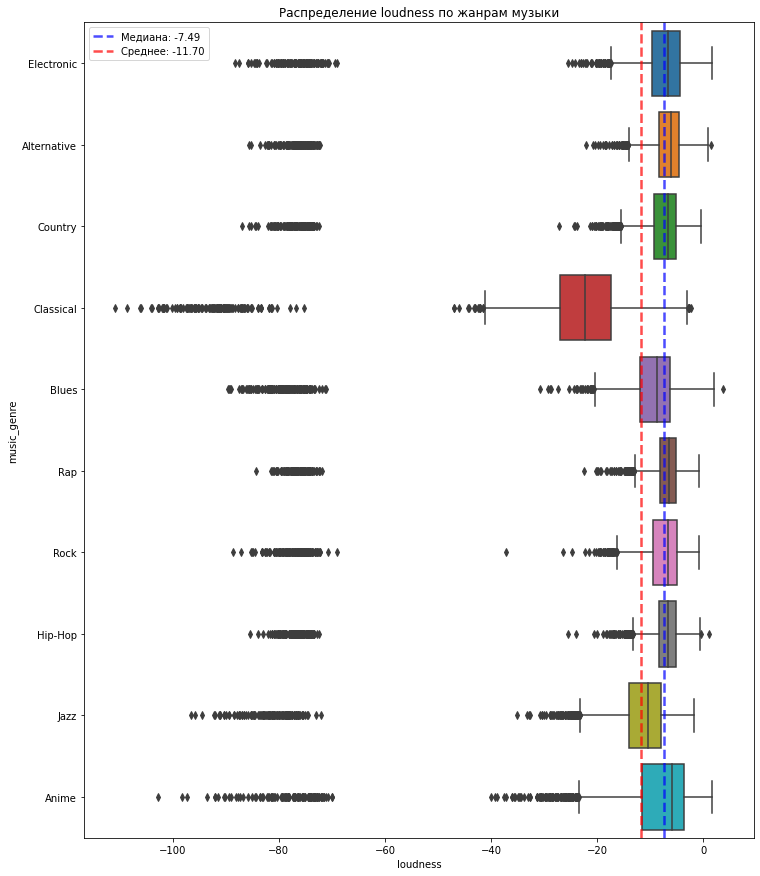

In [357]:
descriptive_stats_and_plot(train, 'loudness')

### Столбец `mode`

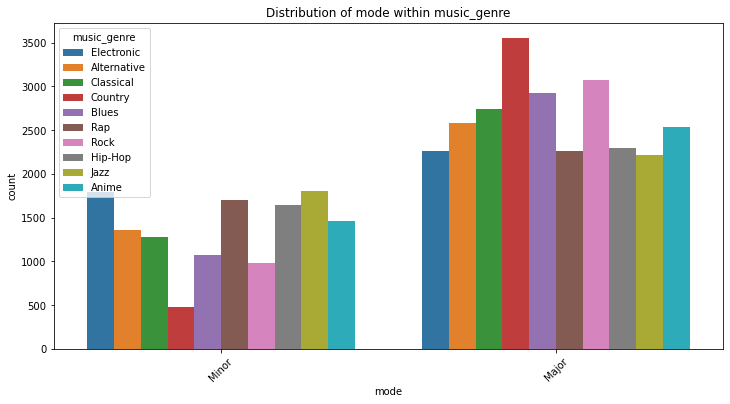

mode         Major  Minor
music_genre              
Alternative   0.66   0.34
Anime         0.63   0.37
Blues         0.73   0.27
Classical     0.68   0.32
Country       0.88   0.12
Electronic    0.56   0.44
Hip-Hop       0.58   0.42
Jazz          0.55   0.45
Rap           0.57   0.43
Rock          0.76   0.24


In [203]:
# Пример использования функции
stats = categorical_analysis(train, 'mode')
print(stats)

* Есть зависимость распределения `mode` от жанра музыки

### Столбец speechiness (#section3_7)


'Описательная статистика для speechiness:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,939.00",0.12,0.20,0.02,0.04,0.05,0.10,1.46
Anime,"4,003.00",0.10,0.19,0.02,0.04,0.05,0.07,1.32
Blues,"3,987.00",0.10,0.19,0.02,0.03,0.04,0.07,1.39
Classical,"4,019.00",0.09,0.19,0.02,0.04,0.04,0.05,1.34
Country,"4,024.00",0.08,0.19,0.02,0.03,0.04,0.05,1.42
Electronic,"4,051.00",0.14,0.21,0.02,0.04,0.06,0.13,1.53
Hip-Hop,"3,935.00",0.25,0.24,0.03,0.09,0.20,0.32,1.82
Jazz,"4,023.00",0.11,0.21,0.02,0.04,0.04,0.08,1.46
Rap,"3,964.00",0.22,0.23,0.02,0.07,0.17,0.29,1.79


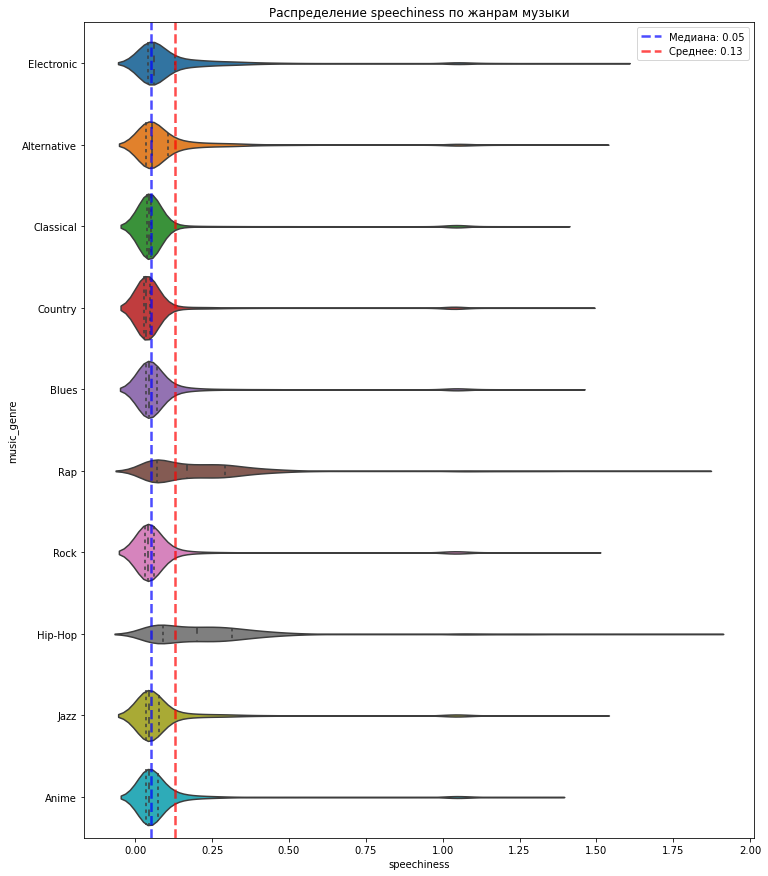

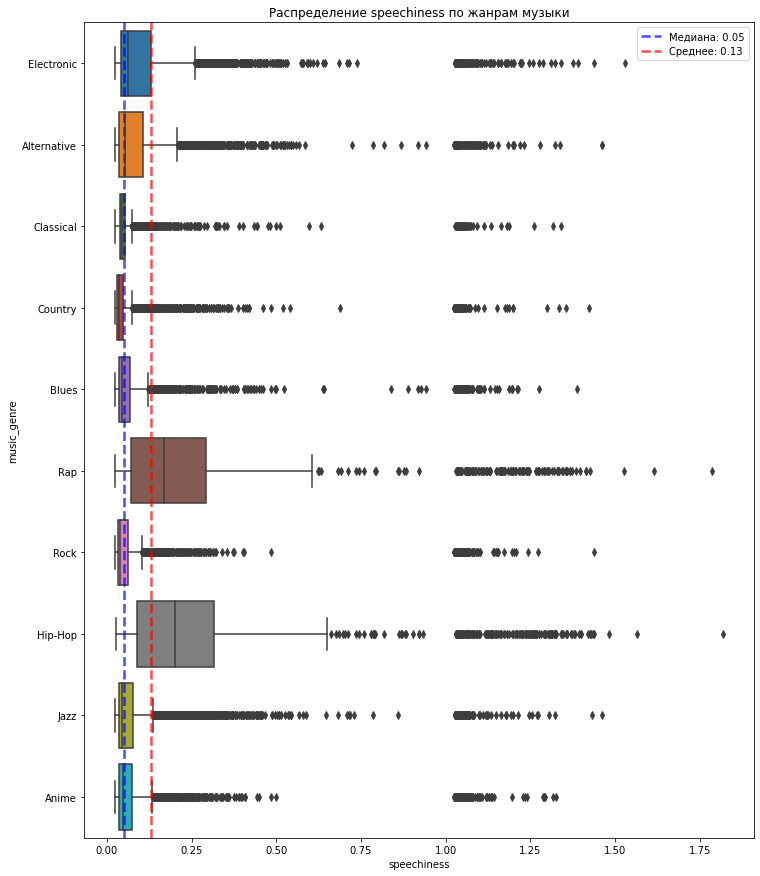

In [204]:
descriptive_stats_and_plot(train, 'speechiness')

'Описательная статистика для speechiness:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,318.00,0.68,0.35,0.30,0.34,0.47,1.04,1.46
Anime,162.00,0.93,0.29,0.30,1.03,1.04,1.07,1.32
Blues,190.00,0.88,0.30,0.30,0.55,1.03,1.05,1.39
Classical,163.00,0.97,0.22,0.32,1.04,1.04,1.05,1.34
Country,161.00,0.93,0.27,0.30,1.03,1.03,1.04,1.42
Electronic,393.00,0.65,0.35,0.30,0.35,0.45,1.05,1.53
Hip-Hop,"1,104.00",0.52,0.30,0.30,0.34,0.39,0.49,1.82
Jazz,286.00,0.76,0.34,0.30,0.37,1.03,1.05,1.46
Rap,916.00,0.51,0.30,0.30,0.33,0.38,0.48,1.79


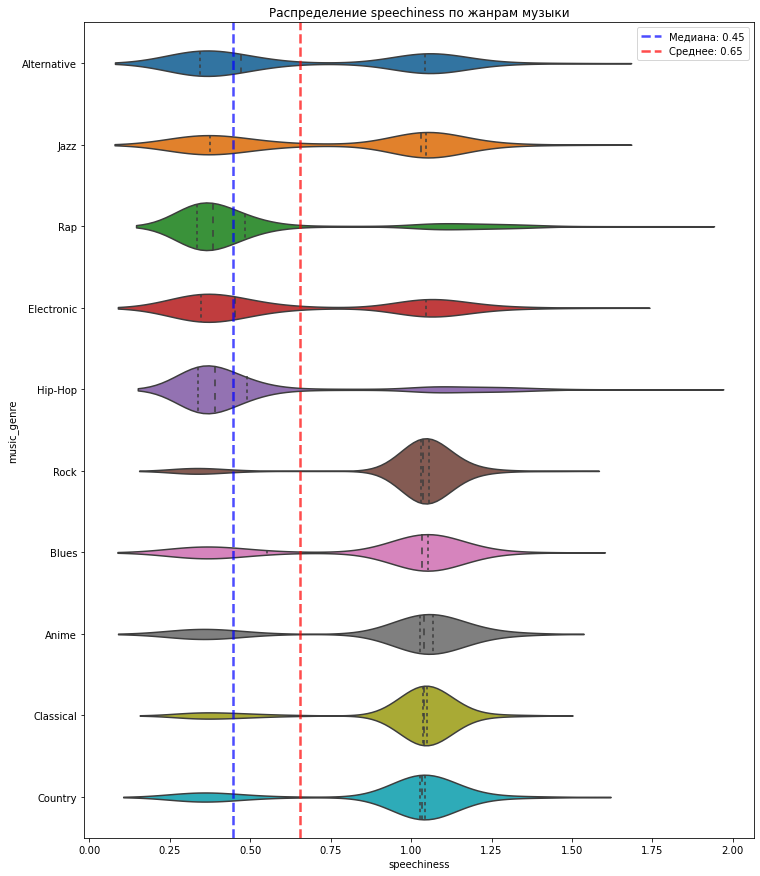

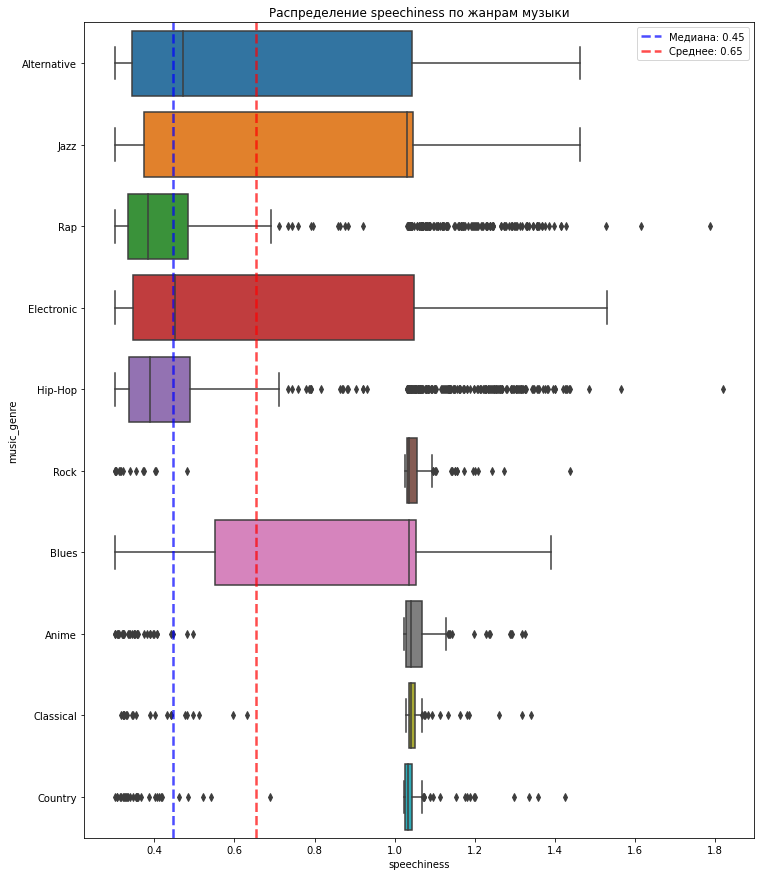

In [205]:
descriptive_stats_and_plot(train.loc[train['speechiness'] > 0.3], 'speechiness')

### Столбец `tempo`

In [206]:
train = replace_question_marks_with_random(train, 'tempo')

train['tempo'].isnull().sum()

0

'Описательная статистика для tempo:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,939.00",122.59,28.90,44.19,99.79,120.25,141.92,213.79
Anime,"4,003.00",126.23,31.74,48.01,100.42,127.07,147.06,215.36
Blues,"3,987.00",121.12,29.08,47.59,99.39,119.02,138.16,215.92
Classical,"4,019.00",103.63,29.41,34.35,80.25,97.95,123.74,212.92
Country,"4,024.00",123.85,28.76,55.51,102.47,123.85,143.78,217.54
Electronic,"4,051.00",126.12,25.30,35.55,110.01,126.02,142.52,220.04
Hip-Hop,"3,935.00",119.92,28.63,47.81,95.28,120.06,140.01,213.79
Jazz,"4,023.00",111.40,28.27,34.77,91.01,105.83,125.69,207.02
Rap,"3,964.00",120.50,28.03,47.81,96.26,120.60,140.00,207.99


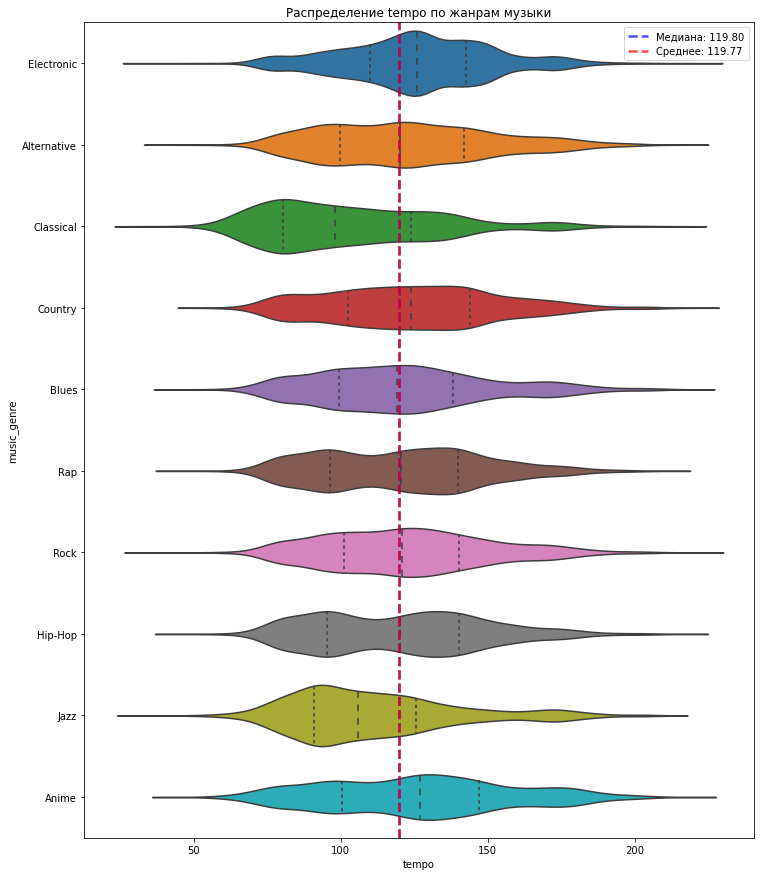

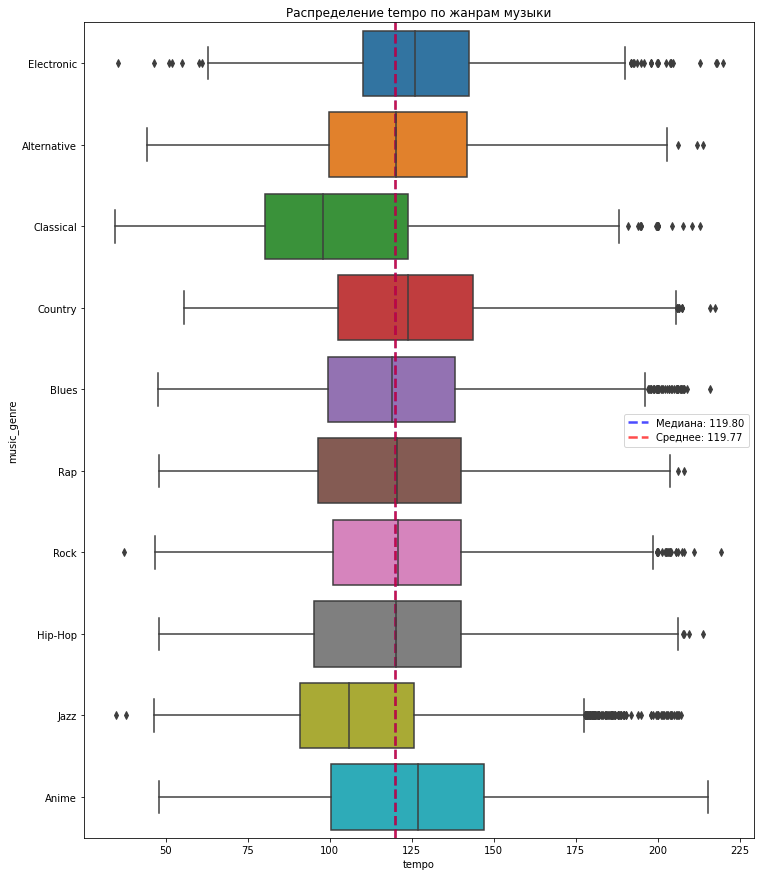

In [207]:
descriptive_stats_and_plot(train, 'tempo')

### Столбец `valence`

'Описательная статистика для valence:'

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,"3,939.00",0.45,0.22,0.03,0.28,0.43,0.60,0.98
Anime,"4,003.00",0.43,0.25,0.00,0.23,0.44,0.62,0.99
Blues,"3,987.00",0.58,0.22,0.03,0.41,0.59,0.76,0.98
Classical,"4,019.00",0.21,0.20,0.00,0.06,0.14,0.31,0.98
Country,"4,024.00",0.54,0.22,0.04,0.36,0.53,0.72,0.98
Electronic,"4,051.00",0.39,0.24,0.03,0.19,0.36,0.56,0.99
Hip-Hop,"3,935.00",0.47,0.22,0.04,0.30,0.47,0.64,0.98
Jazz,"4,023.00",0.51,0.25,0.03,0.30,0.51,0.71,0.98
Rap,"3,964.00",0.45,0.21,0.03,0.29,0.44,0.61,0.97


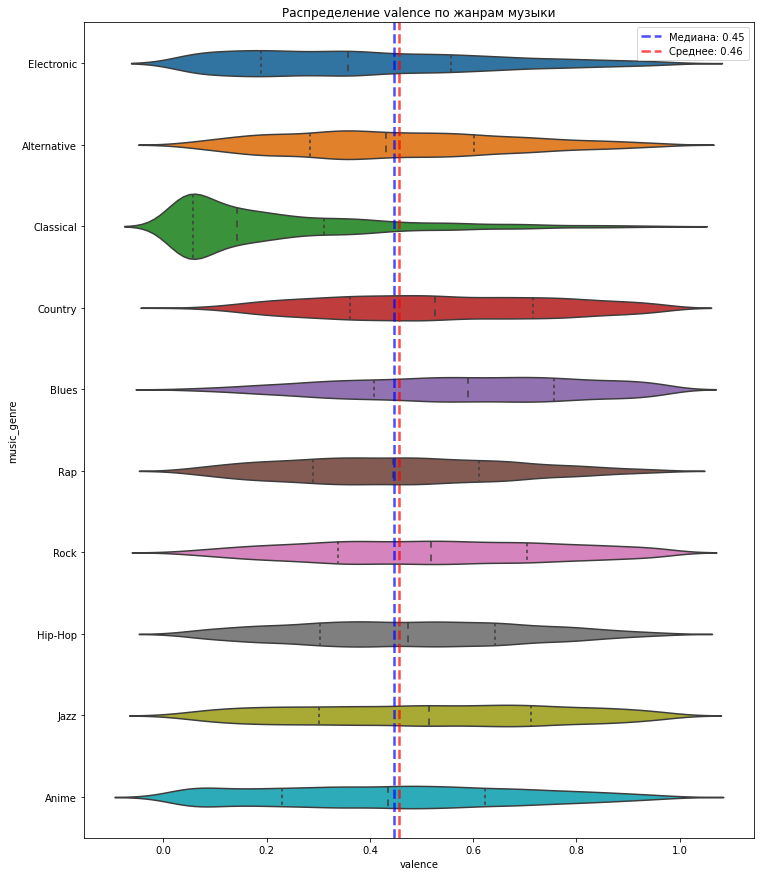

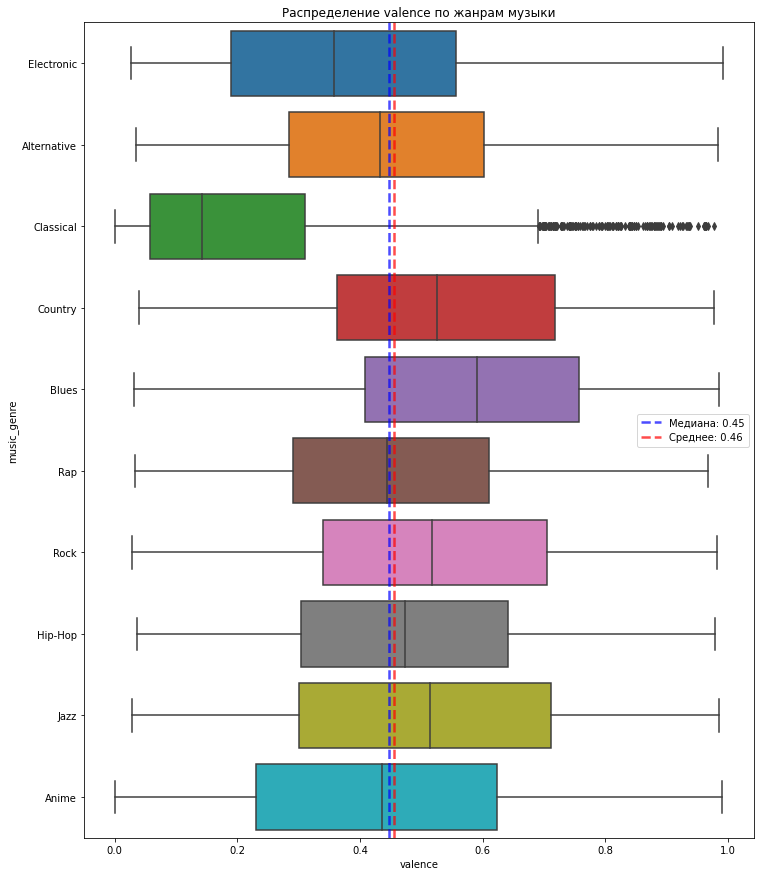

In [208]:
descriptive_stats_and_plot(train, 'valence')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       40000 non-null  int64  
 1   track_name        29262 non-null  object 
 2   popularity        36078 non-null  float64
 3   acousticness      40000 non-null  float64
 4   danceability      37963 non-null  float64
 5   duration_ms       40000 non-null  float64
 6   energy            40000 non-null  float64
 7   instrumentalness  40000 non-null  float64
 8   key               38577 non-null  object 
 9   liveness          40000 non-null  float64
 10  loudness          40000 non-null  float64
 11  mode              38147 non-null  object 
 12  speechiness       40000 non-null  float64
 13  tempo             40000 non-null  object 
 14  obtained_date     33781 non-null  object 
 15  valence           40000 non-null  float64
 16  music_genre       40000 non-null  object

1. popularity - заполнить проуски медианой. Изменить тип столбца на int
2. danceability - заполнить пропуски средним
3. duration - Заменить значения -1 на медиану
4. key - заполнить пропуски самым частым значением или заглушкой
5. liveness - возвести в квадрат или взять логарифм

### Посмотрим на корреляцию признаков в train

In [211]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       40000 non-null  int64  
 1   track_name        29262 non-null  object 
 2   popularity        40000 non-null  float64
 3   acousticness      40000 non-null  float64
 4   danceability      40000 non-null  float64
 5   duration_ms       40000 non-null  float64
 6   energy            40000 non-null  float64
 7   instrumentalness  40000 non-null  float64
 8   key               40000 non-null  object 
 9   liveness          40000 non-null  float64
 10  loudness          40000 non-null  float64
 11  mode              40000 non-null  object 
 12  speechiness       40000 non-null  float64
 13  tempo             40000 non-null  float64
 14  obtained_date     33781 non-null  object 
 15  valence           40000 non-null  float64
 16  music_genre       40000 non-null  object

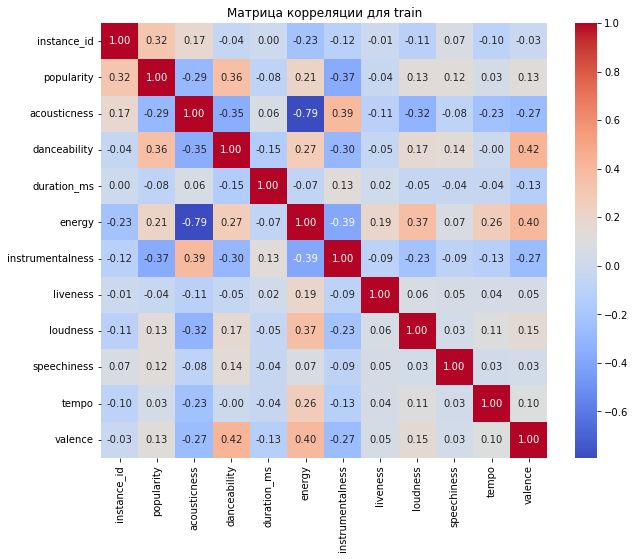

In [209]:
corr_matrix_train = train.corr()

# Визуализация матрицы корреляции для hotel_train
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_train, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции для train")
plt.show()


interval columns not set, guessing: ['instance_id', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


c:\Users\eprutskoy\Anaconda3\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable track_name is large: 26018. Are you sure this is not an interval variable? Analysis for pairs of variables including track_name can be slow.
  warnings.warn(


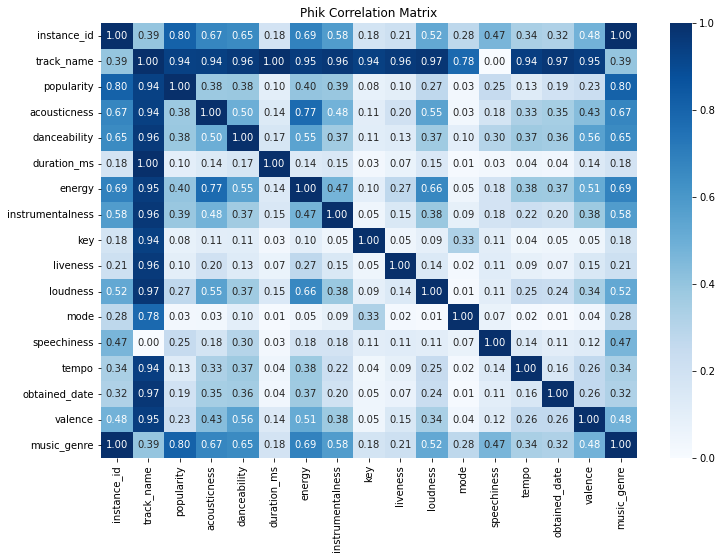

In [213]:
# Расчет матрицы корреляции phik
phik_matrix = train.phik_matrix()

# Построение тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.title('Phik Correlation Matrix')
plt.show()

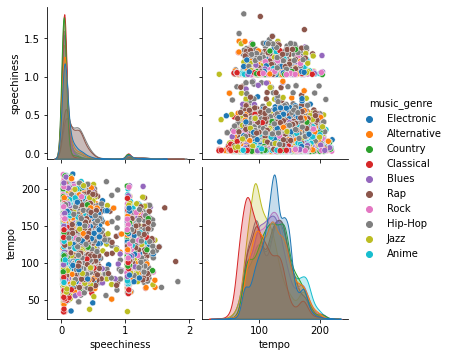

In [55]:
sns.pairplot(train, vars=['speechiness', 'tempo'], hue='music_genre')
plt.show()

In [ ]:
train.columns

Index(['instance_id', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date',
       'valence', 'music_genre'],
      dtype='object')

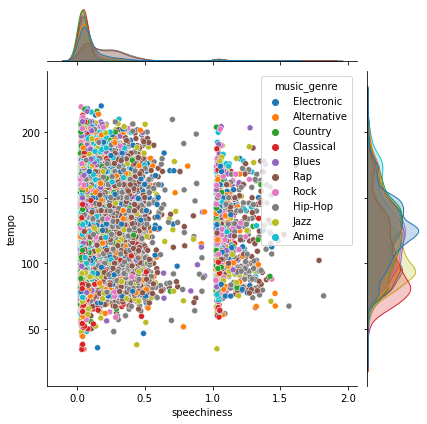

In [56]:
sns.jointplot(data=train, x='speechiness', y='tempo', kind='scatter', hue='music_genre');

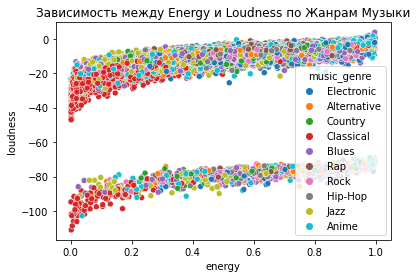

In [ ]:
sns.scatterplot(data=train, x='energy', y='loudness', hue='music_genre')
plt.title("Зависимость между Energy и Loudness по Жанрам Музыки")
plt.show()